In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder

In [2]:
train_df = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/train.csv')
test_df = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/test.csv')
submission = pd.read_csv('C:/Users/dideo/yeardreamsc/study_repo/5.kaggle/0002 house_price/sample_submission.csv')

In [3]:
import copy

raw_train = copy.deepcopy(train_df)
raw_test = copy.deepcopy(test_df)

## 피쳐 엔지니어링

Text(0.5, 1.0, 'log tramsformation')

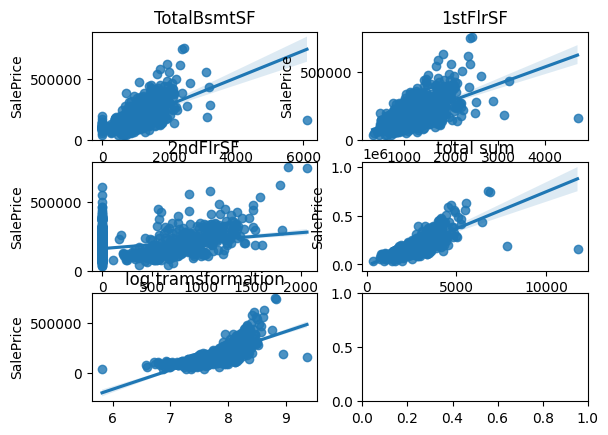

In [4]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,_)) = plt.subplots(nrows=3, ncols=2)
sns.regplot(x= train_df['TotalBsmtSF'], y=train_df['SalePrice'], ax=ax1)
ax1.set_title('TotalBsmtSF')
sns.regplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'], ax=ax2)
ax2.set_title('1stFlrSF')
sns.regplot(x=train_df['2ndFlrSF'], y=train_df['SalePrice'], ax=ax3)
ax3.set_title('2ndFlrSF')
sns.regplot(x=(train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']) , y=train_df['SalePrice'], ax=ax4)
ax4.set_title('total sum')
sns.regplot(x=(np.log(train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF'])) , y=train_df['SalePrice'], ax=ax5)
ax5.set_title('log tramsformation')
# 전체 면적이 가장 큰 상관관계를 보여줌

In [5]:
# 전처리를 위해 임시로 concat
all_data = pd.concat((train_df,test_df),axis=0).reset_index(drop=True)

In [6]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

all_data.drop(['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

<Axes: ylabel='SalePrice'>

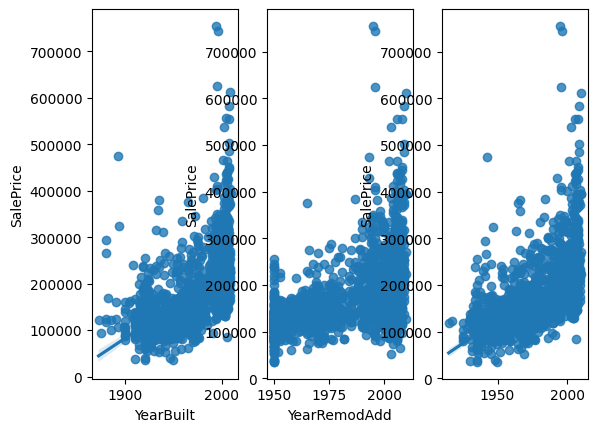

In [7]:
fig , axs = plt.subplots(nrows=1, ncols=3)
sns.regplot(x=train_df['YearBuilt'], y=train_df['SalePrice'], ax=axs[0])
sns.regplot(x=train_df['YearRemodAdd'], y=train_df['SalePrice'], ax=axs[1])
sns.regplot(x=(train_df['YearBuilt'] + train_df['YearRemodAdd'])/2, y=train_df['SalePrice'], ax=axs[2])

In [8]:
train_df['MSSubClass'].nunique()

15

<Axes: xlabel='MSSubClass', ylabel='count'>

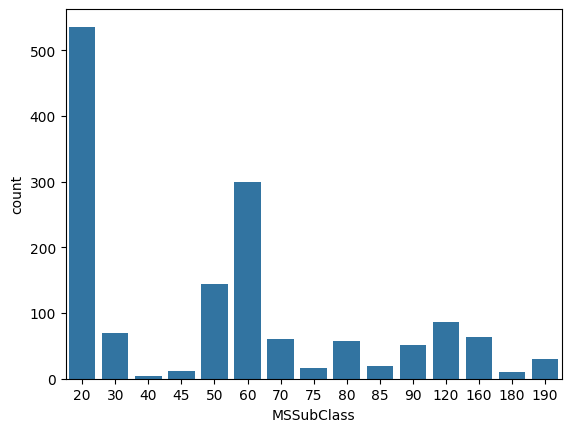

In [9]:
sns.barplot(x=train_df['MSSubClass'].value_counts().index , y=train_df['MSSubClass'].value_counts())

<Axes: xlabel='YrSold', ylabel='count'>

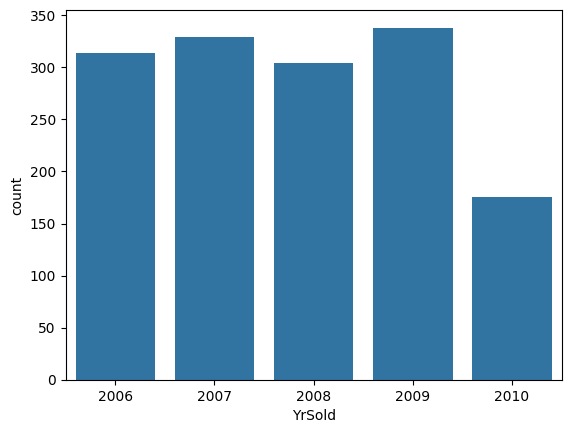

In [10]:
sns.barplot(x=train_df['YrSold'].value_counts().index , y=train_df['YrSold'].value_counts())

In [11]:
pd.DataFrame(train_df['YrSold'].value_counts())

,count
YrSold,
2009,338
2007,329
2006,314
2008,304
2010,175


In [12]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data.drop(['YrBltAndRemod','YearBuilt', 'YearRemodAdd'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,No2ndFlr,NoBsmt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500.0,2566.0,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500.0,2524.0,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500.0,2706.0,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000.0,2473.0,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000.0,3343.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,NaN,1638.0,False,False
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2006,WD,Abnorml,NaN,1638.0,False,False
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2006,WD,Abnorml,NaN,2448.0,True,False
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,NaN,1882.0,True,False


In [13]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)  #빌딩 넘버는 수치적인 의미라기보단 범주형 의미
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

In [14]:
for col in train_df.columns:
    if col.startswith('Total'):
        print(col)

TotalBsmtSF


In [15]:
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt = all_data[Basement]

Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt = Bsmt.replace(to_replace='No', value=1)
Bsmt = Bsmt.replace(to_replace='Mn', value=2)
Bsmt = Bsmt.replace(to_replace='Av', value=3)
Bsmt = Bsmt.replace(to_replace='Gd', value=4)

Bsmt = Bsmt.replace(to_replace='Unf', value=1)
Bsmt = Bsmt.replace(to_replace='LwQ', value=2)
Bsmt = Bsmt.replace(to_replace='Rec', value=3)
Bsmt = Bsmt.replace(to_replace='BLQ', value=4)
Bsmt = Bsmt.replace(to_replace='ALQ', value=5)
Bsmt = Bsmt.replace(to_replace='GLQ', value=6)

In [16]:
Bsmt

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,TotalBsmtSF
0,3.0,1.0,706.0,0.0,6.0,1.0,4.0,150.0,856.0
1,3.0,4.0,978.0,0.0,5.0,1.0,4.0,284.0,1262.0
2,3.0,2.0,486.0,0.0,6.0,1.0,4.0,434.0,920.0
3,4.0,1.0,216.0,0.0,5.0,1.0,3.0,540.0,756.0
4,3.0,3.0,655.0,0.0,6.0,1.0,4.0,490.0,1145.0
...,...,...,...,...,...,...,...,...,...
2914,3.0,1.0,0.0,0.0,1.0,1.0,3.0,546.0,546.0
2915,3.0,1.0,252.0,0.0,3.0,1.0,3.0,294.0,546.0
2916,3.0,1.0,1224.0,0.0,5.0,1.0,3.0,0.0,1224.0
2917,3.0,3.0,337.0,0.0,6.0,1.0,4.0,575.0,912.0


In [17]:
# 점수부여, 곱

Bsmt['BsmtScore'] = Bsmt['BsmtQual'] * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore'] = Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore'] = Bsmt['BsmtFin']
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

all_data.drop(Basement, axis=1, inplace=True)

In [18]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)
all_data['LotScore']=Lot['LotScore']

all_data.drop(lot, axis=1, inplace=True)

In [19]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)


Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

In [20]:
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish'])*(Garage['GarageQual']) * \
(Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']


all_data.drop(garage, axis=1, inplace=True)

In [21]:
# target log transformation
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

In [22]:
cnt = 0
for col in train_df.columns:
    percent = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train_df[col].isnull().sum() / train_df[col].shape[0]))
    if percent[-5:] != '0.00%':  ## string.find('0.00%') == -1 
        print(percent)
        cnt +=1

print()
print(f'결측치가 포함된 칼럼의 갯수 : {cnt}')

column: LotFrontage	 Percent of NaN value: 17.74%
column:      Alley	 Percent of NaN value: 93.77%
column: MasVnrType	 Percent of NaN value: 59.73%
column: MasVnrArea	 Percent of NaN value: 0.55%
column:   BsmtQual	 Percent of NaN value: 2.53%
column:   BsmtCond	 Percent of NaN value: 2.53%
column: BsmtExposure	 Percent of NaN value: 2.60%
column: BsmtFinType1	 Percent of NaN value: 2.53%
column: BsmtFinType2	 Percent of NaN value: 2.60%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 47.26%
column: GarageType	 Percent of NaN value: 5.55%
column: GarageYrBlt	 Percent of NaN value: 5.55%
column: GarageFinish	 Percent of NaN value: 5.55%
column: GarageQual	 Percent of NaN value: 5.55%
column: GarageCond	 Percent of NaN value: 5.55%
column:     PoolQC	 Percent of NaN value: 99.52%
column:      Fence	 Percent of NaN value: 80.75%
column: MiscFeature	 Percent of NaN value: 96.30%

결측치가 포함된 칼럼의 갯수 : 19


In [23]:
#Null값이 많은 column삭제
all_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [24]:
all_data

,MSSubClass,MSZoning,Street,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,TotalSF,No2ndFlr,NoBsmt,YrBltAndRemod,BsmtScore,BsmtFinScore,BsmtDNF,LotScore,NoGarage,GarageScore
0,60,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,2566.0,False,False,4006,10272.0,4236.0,False,13.216311,False,39456.0
1,20,RL,Pave,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,...,2524.0,True,False,3952,15144.0,4890.0,False,13.551546,False,33120.0
2,60,RL,Pave,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,...,2706.0,False,False,4003,11040.0,2916.0,False,13.547632,False,43776.0
3,70,RL,Pave,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,...,2473.0,False,False,3885,9072.0,1080.0,False,13.258643,False,11556.0
4,60,RL,Pave,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,...,3343.0,False,False,4000,13740.0,3930.0,False,13.996031,False,90288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,Lvl,AllPub,Gtl,MeadowV,Norm,Norm,Twnhs,...,1638.0,False,False,3940,4914.0,0.0,True,10.612926,True,NaN
2915,160,RM,Pave,Lvl,AllPub,Gtl,MeadowV,Norm,Norm,TwnhsE,...,1638.0,False,False,3940,4914.0,756.0,False,10.590994,False,858.0
2916,20,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,...,2448.0,True,False,3956,11016.0,6120.0,False,14.978662,False,6912.0
2917,85,RL,Pave,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,...,1882.0,True,False,3984,10944.0,2022.0,False,13.380632,True,NaN


In [25]:
all_data.shape

(2919, 63)

In [26]:
#Numerical column은 평균으로 대체
print(all_data.isnull().sum().sum())
all_data.fillna(all_data.mean(numeric_only=True), inplace=True)  #Data Leakage의 방지를 위해서는 원래는 반드시 train data의 정보만을 사용해야 한다. 

4075


In [27]:
#Categorical column의 결측치 처리
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#OneHot Encoding전 shape
print('OneHot Encoding 전 트레인 데이터 shape',all_data.shape)

cat_cols = [col for col in all_data.columns if all_data[col].dtypes == 'object']
num_cols = [col for col in all_data.columns if all_data[col].dtypes != 'object']


ohe.fit(all_data[cat_cols])
encoded_columns = ohe.transform(all_data[cat_cols])
feature_names = ohe.get_feature_names_out()
encoded_columns = pd.DataFrame(encoded_columns, columns=feature_names)

all_data.drop(cat_cols, axis=1, inplace=True)                      


# all_data의 중복된 인덱스 제거
all_data = all_data[~all_data.index.duplicated()]

# encoded_columns의 중복된 인덱스 제거
encoded_columns = encoded_columns[~encoded_columns.index.duplicated()]

# 두 데이터 프레임 결합
all_data = pd.concat([all_data, encoded_columns], axis=1)

#OneHot Encoding이후 shape
print('OneHot Encoding 후 트레인 데이터 shape',all_data.shape)

OneHot Encoding 전 트레인 데이터 shape (2919, 63)
OneHot Encoding 후 트레인 데이터 shape (2919, 256)


In [28]:
all_data[['Utilities_AllPub','Utilities_NoSeWa', 'Utilities_nan']]

,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2914,1.0,0.0,0.0
2915,1.0,0.0,0.0
2916,1.0,0.0,0.0
2917,1.0,0.0,0.0


In [29]:
all_data.loc[all_data['Utilities_nan'] == 1.0, ['Utilities_AllPub','Utilities_NoSeWa']]


,Utilities_AllPub,Utilities_NoSeWa
1915,0.0,0.0
1945,0.0,0.0


In [30]:
all_data.isnull().sum().sum() ##결측치가 모두 채워짐

0

In [31]:
# # 결측 칼럼들을 모두 지워준다. 
# def nan_col_remover(all_data):
#     for col in all_data:
#         if 'nan' in col:
#             all_data.drop(col,axis=0 ,inplace=True)


In [32]:
from scipy.stats import skew

skew_features = all_data[num_cols].apply(lambda x: skew(x))
# skewness가 1 이상인 칼럼 추출
skew_features_top = skew_features[skew_features >1]

In [33]:
skew_features

OverallQual       0.197110
OverallCond       0.570312
YearBuilt        -0.599806
YearRemodAdd     -0.451020
MasVnrArea        2.611549
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtFullBath      0.623955
BsmtHalfBath      3.931343
FullBath          0.167606
HalfBath          0.694566
BedroomAbvGr      0.326324
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
SalePrice         0.171404
TotalSF           1.515609
No2ndFlr         -0.288675
NoBsmt            5.869458
YrBltAndRemod    -0.304307
BsmtScore         2.158259
BsmtFinScore      1.712181
BsmtDNF           0.917383
LotScore         -1.254539
NoGarage          3.955907
GarageScore       1.777560
dtype: float64

In [34]:
skew_features_top

MasVnrArea        2.611549
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtHalfBath      3.931343
KitchenAbvGr      4.302254
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
TotalSF           1.515609
NoBsmt            5.869458
BsmtScore         2.158259
BsmtFinScore      1.712181
NoGarage          3.955907
GarageScore       1.777560
dtype: float64

In [35]:
# skew feature의 log transformation
all_data[skew_features_top.index] = np.log1p(all_data[skew_features_top.index])

In [36]:
print(train_df.shape, test_df.shape)
train_df=all_data[:len(train_df)]
test_df=all_data[len(train_df):]
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)
(1460, 256) (1459, 256)


## 선형 회귀 모델

In [37]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE(RMSLE):', np.round(rmse,3))
    return rmse
    
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)



#model define
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 716725.082
Ridge 로그 변환된 RMSE(RMSLE): 0.127
Lasso 로그 변환된 RMSE(RMSLE): 0.328


[716725.0817034754, 0.12723245829695803, 0.32803277814531506]

In [39]:
def get_coef(model, n=10):
    coef = pd.Series(model.coef_, index = X_features.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    
    return coef_high,coef_low

def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        axs[i].set_title(model.__class__.__name__+'Coefficients', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)
        
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])

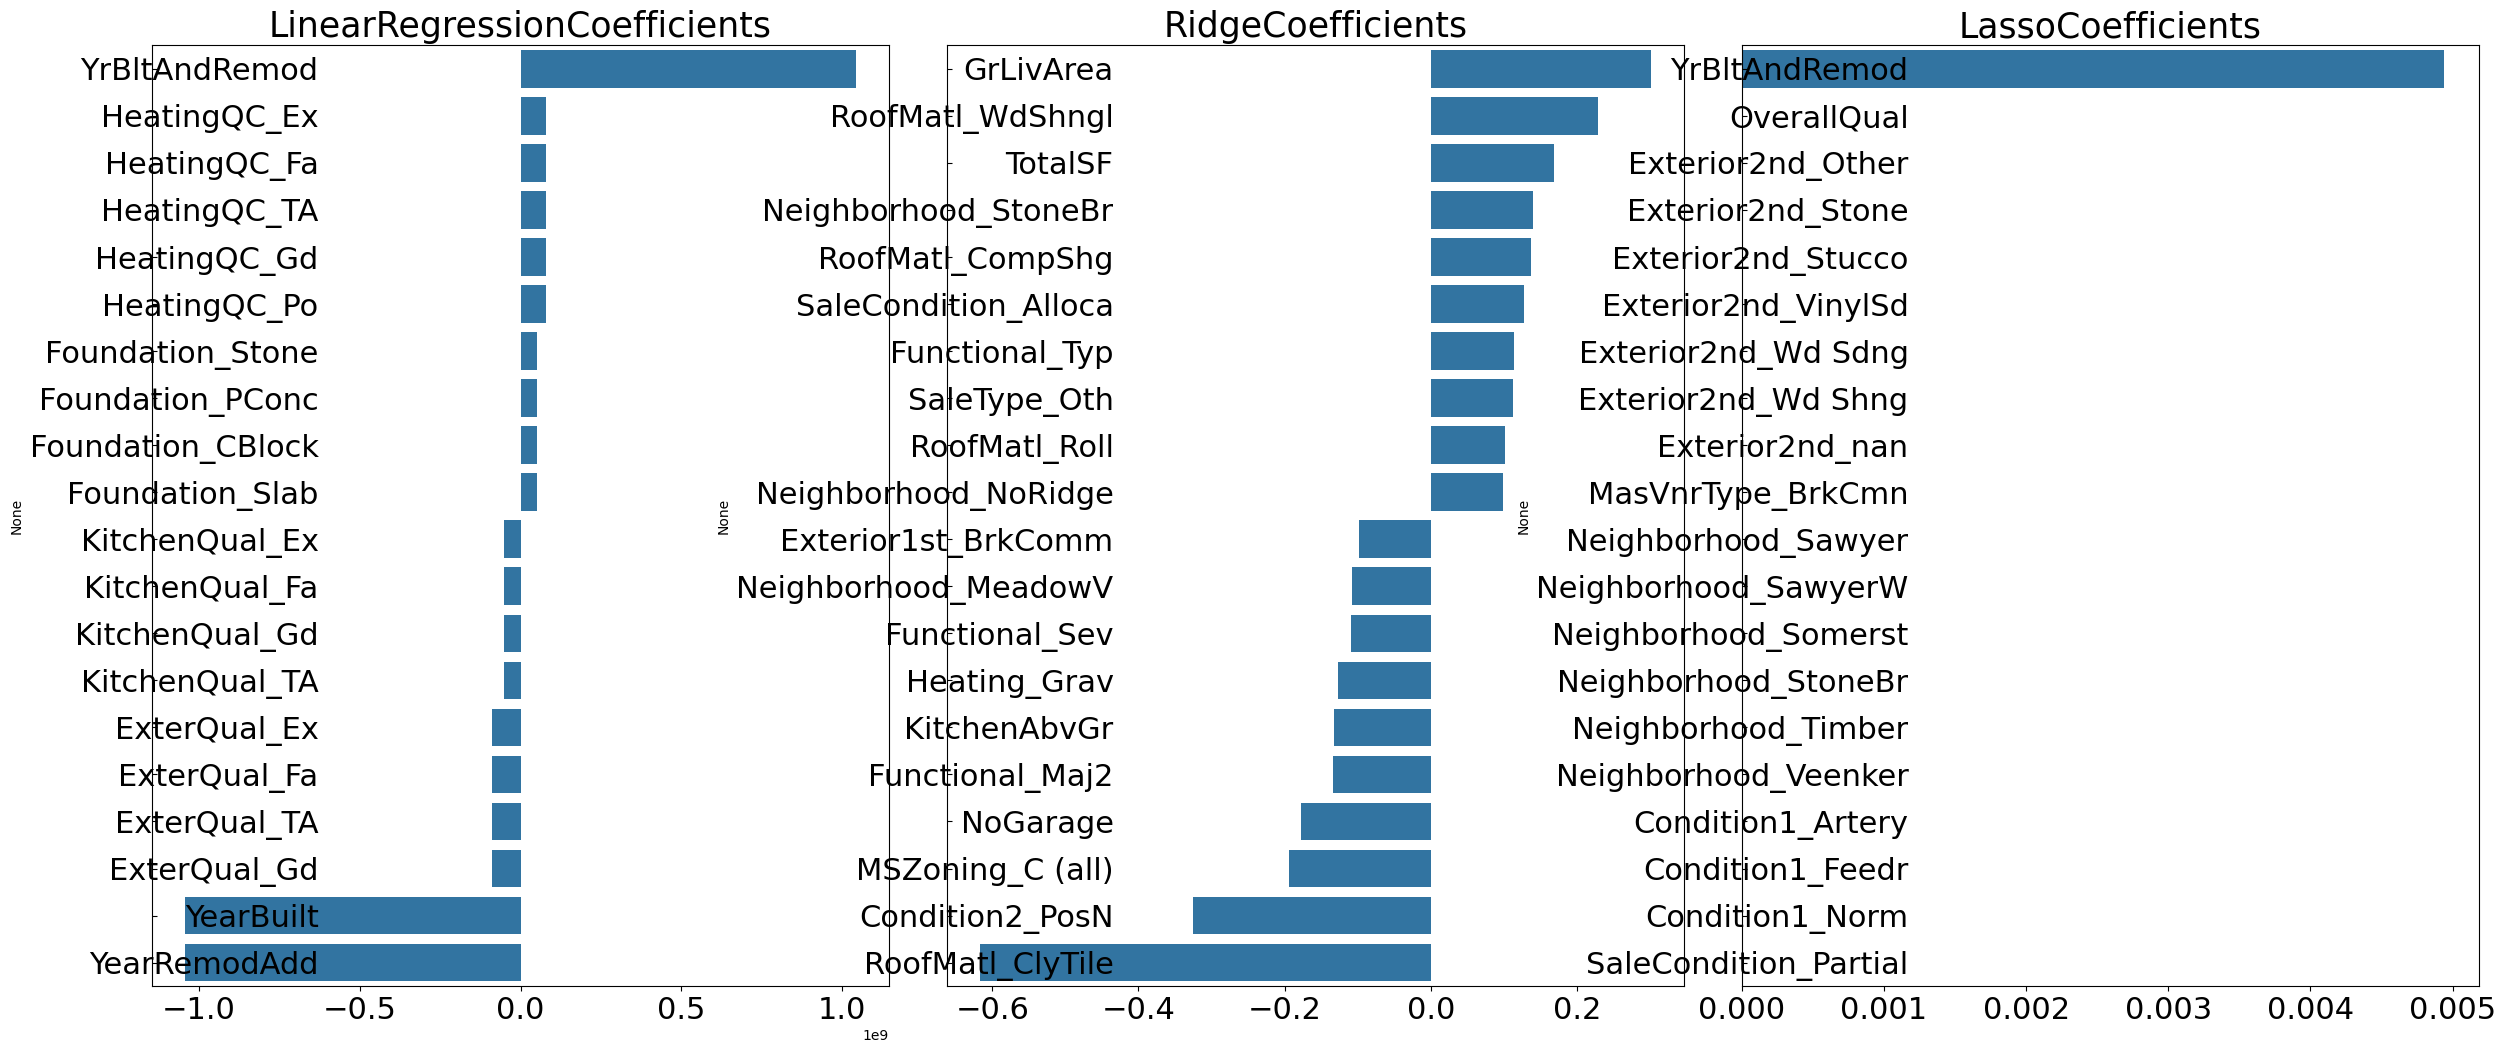

In [40]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

In [41]:
from sklearn.model_selection import GridSearchCV


def print_best_params(model,params):
    grid_model = GridSearchCV(model,param_grid=params,
                              scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값 : {1}, 최적 alpha :{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))
    

In [42]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

In [43]:
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [44]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 716725.082
Ridge 로그 변환된 RMSE(RMSLE): 0.131
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[716725.0817034754, 0.13067196055398725, 0.13228646099123959]

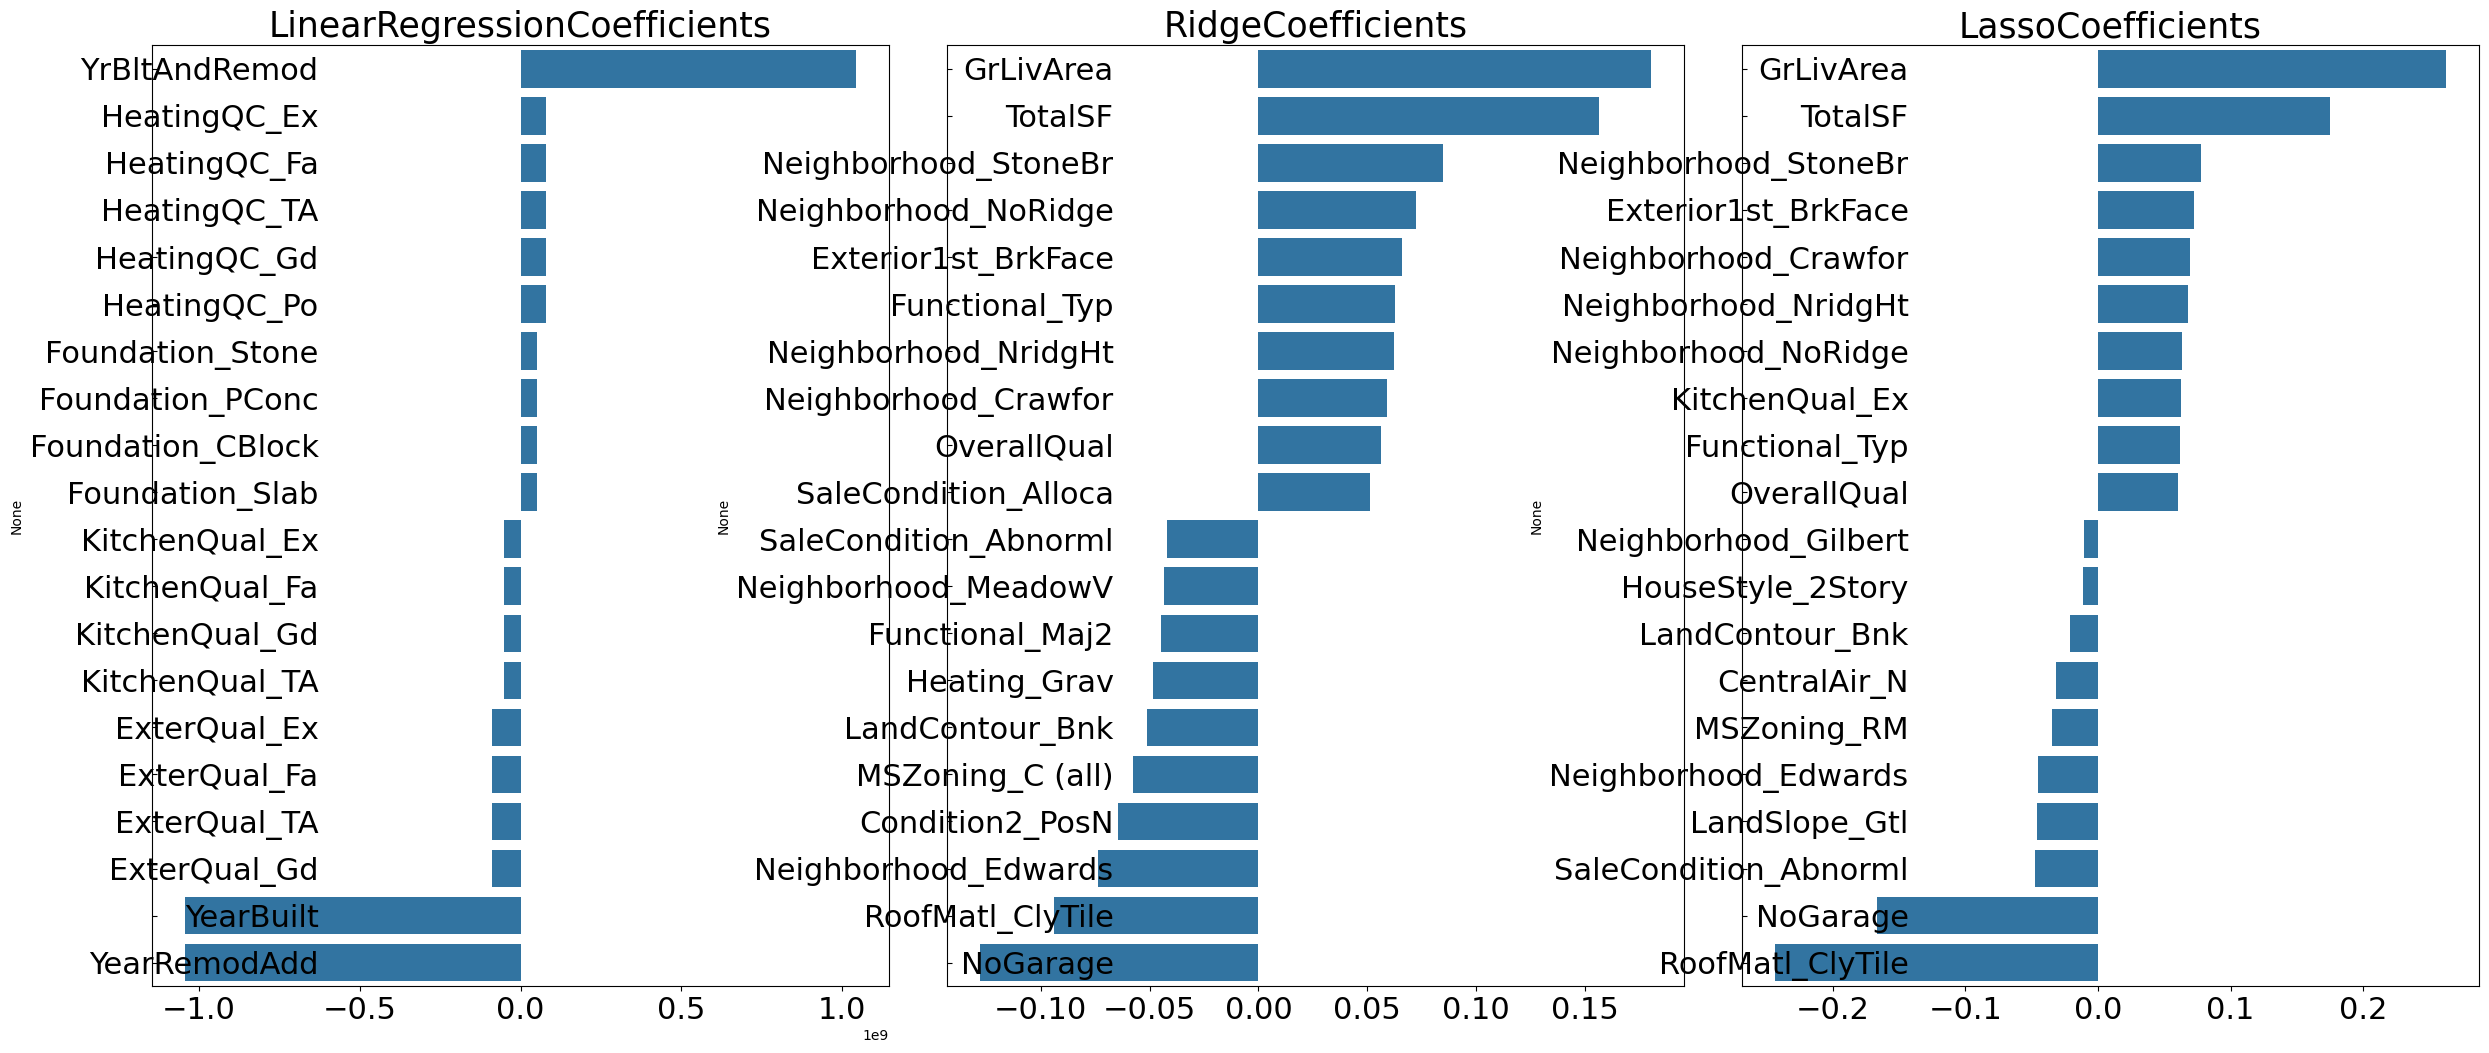

In [45]:
visualize_coef(models)

In [46]:
y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)

In [47]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [48]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 716725.082
Ridge 로그 변환된 RMSE(RMSLE): 0.13
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[716725.0817034754, 0.13039383639342186, 0.13228646099123959]

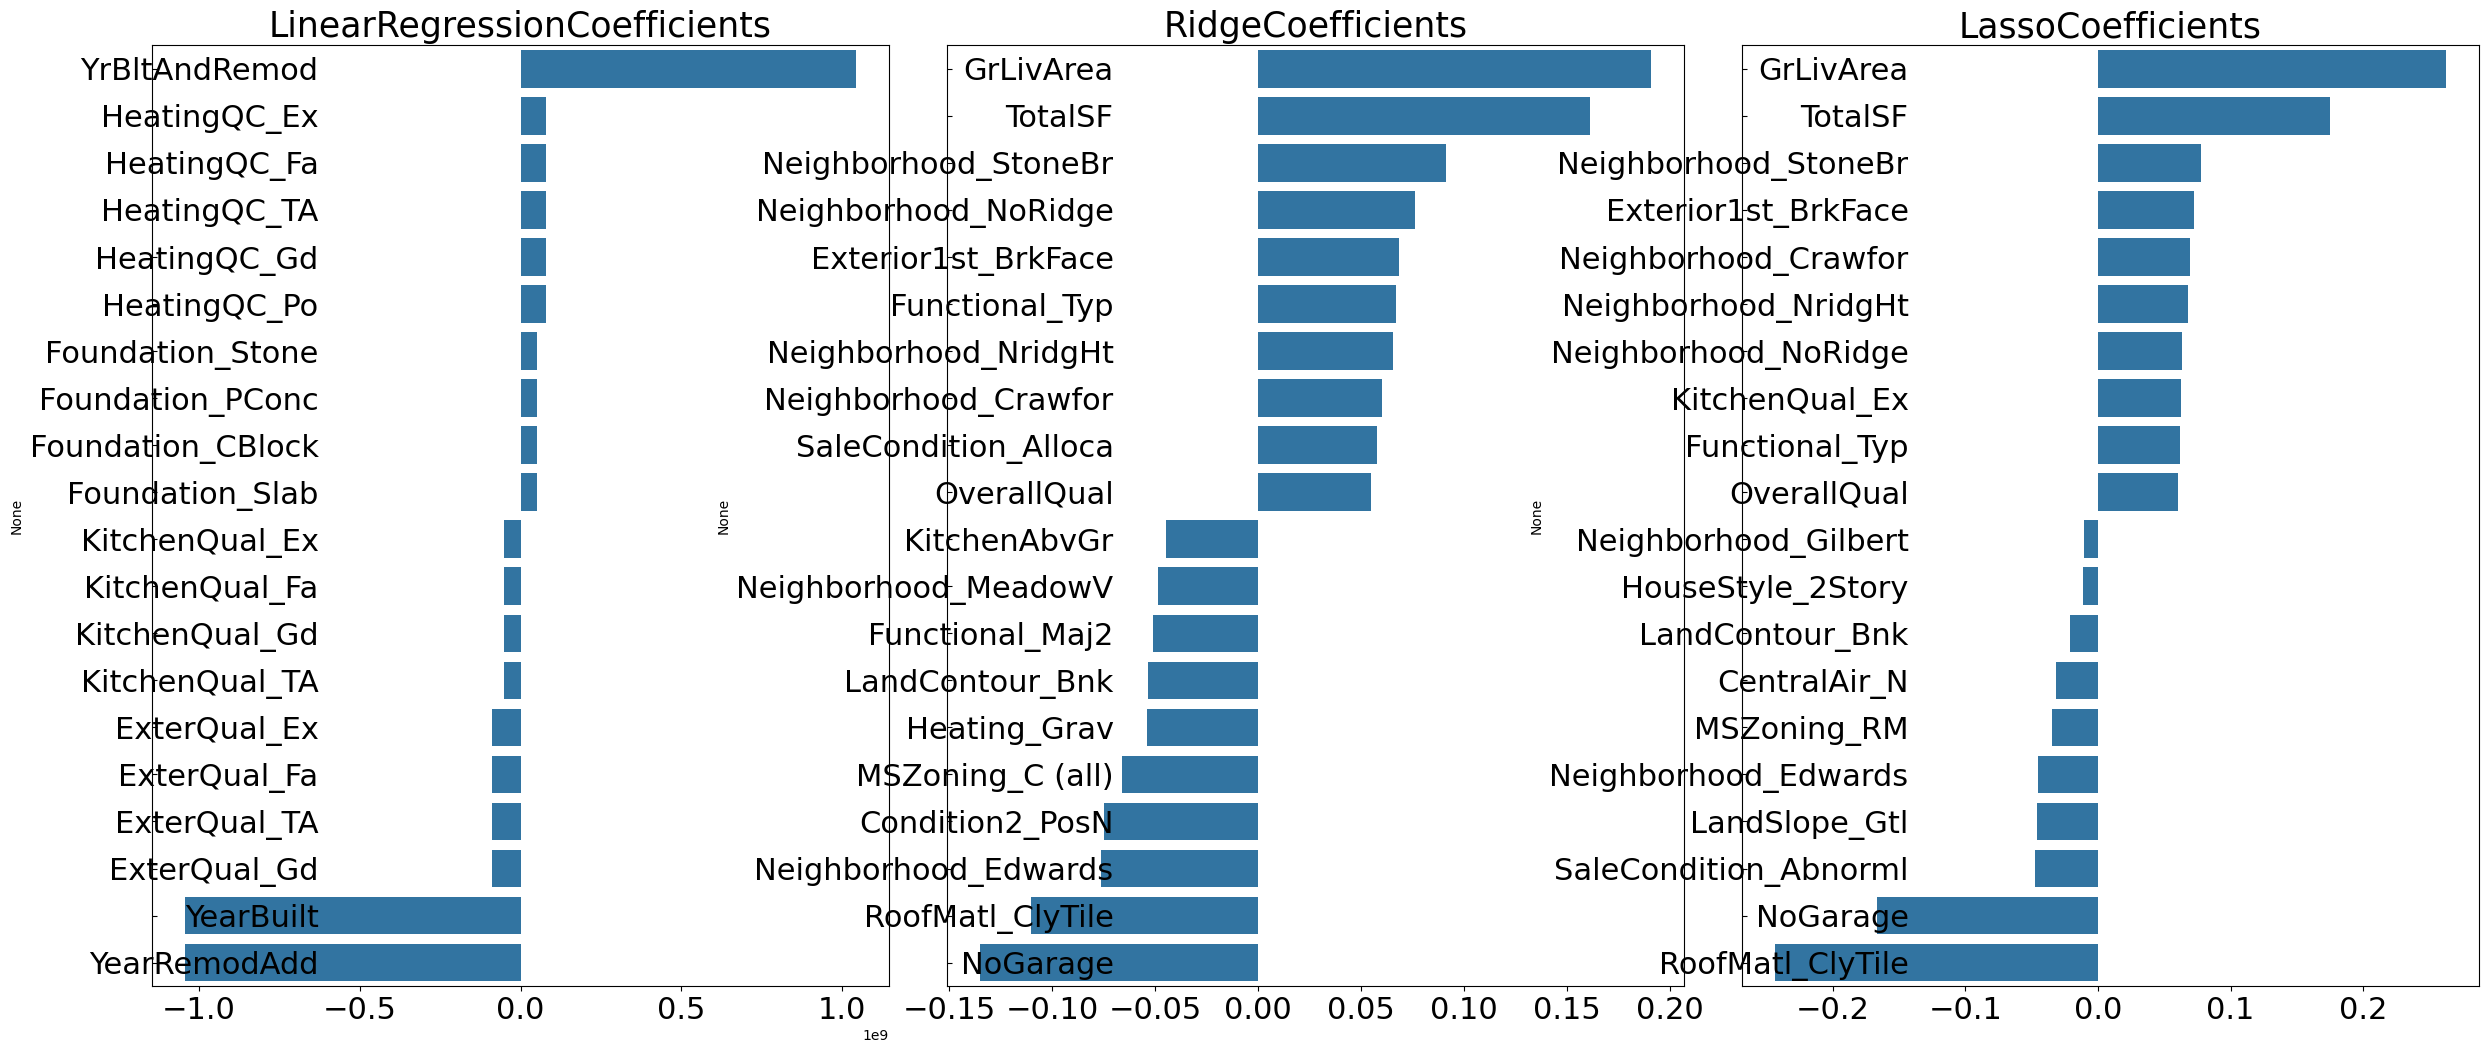

In [49]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

단변량 분석

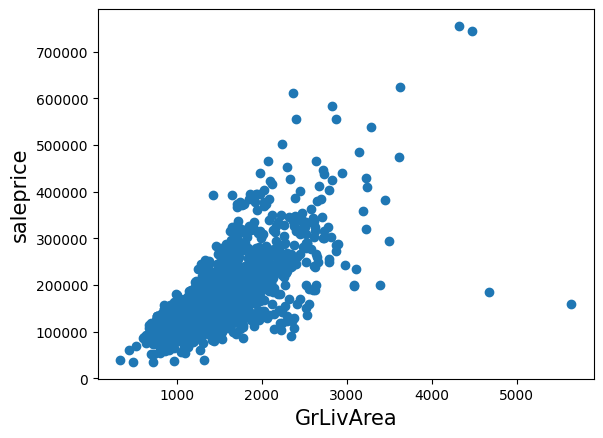

In [50]:
plt.scatter(x= raw_train['GrLivArea'], y=raw_train['SalePrice']) #원본 데이터
plt.ylabel('saleprice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

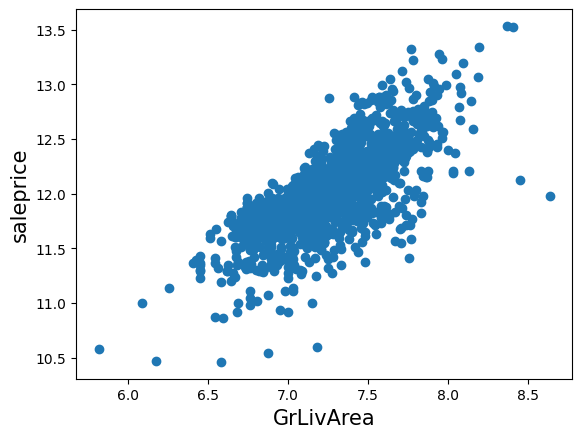

In [51]:
plt.scatter(x= train_df['GrLivArea'], y=train_df['SalePrice']) #원본 데이터
plt.ylabel('saleprice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [52]:
cond1 = raw_train['GrLivArea']> 4000
cond2 = raw_train['SalePrice']< 500000
outlier_index = raw_train[cond1&cond2].index
outlier_index

Index([523, 1298], dtype='int64')

In [53]:
### 이상치 제거 ####
#train_df.drop(outlier_index, axis=0, inplace=True)

## Modeling

In [54]:
# 이상치 제거후 피쳐 다시 생성
y_target = train_df['SalePrice']
X_features = train_df.drop('SalePrice',axis=1, inplace=False)
X_train, X_test , y_train, y_test = train_test_split(X_features,y_target,test_size=0.2, random_state=42)

In [55]:
ridge_params= { 'alpha' : [0.05, 0.1, 1, 5, 8 ,10, 12 ,15, 20]}
lasso_params= { 'alpha' : [0.001,0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.13, 최적 alpha :{'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.128, 최적 alpha :{'alpha': 0.001}


In [56]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg,ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE(RMSLE): 716725.082
Ridge 로그 변환된 RMSE(RMSLE): 0.13
Lasso 로그 변환된 RMSE(RMSLE): 0.132


[716725.0817034754, 0.1300612510560675, 0.13228646099123959]

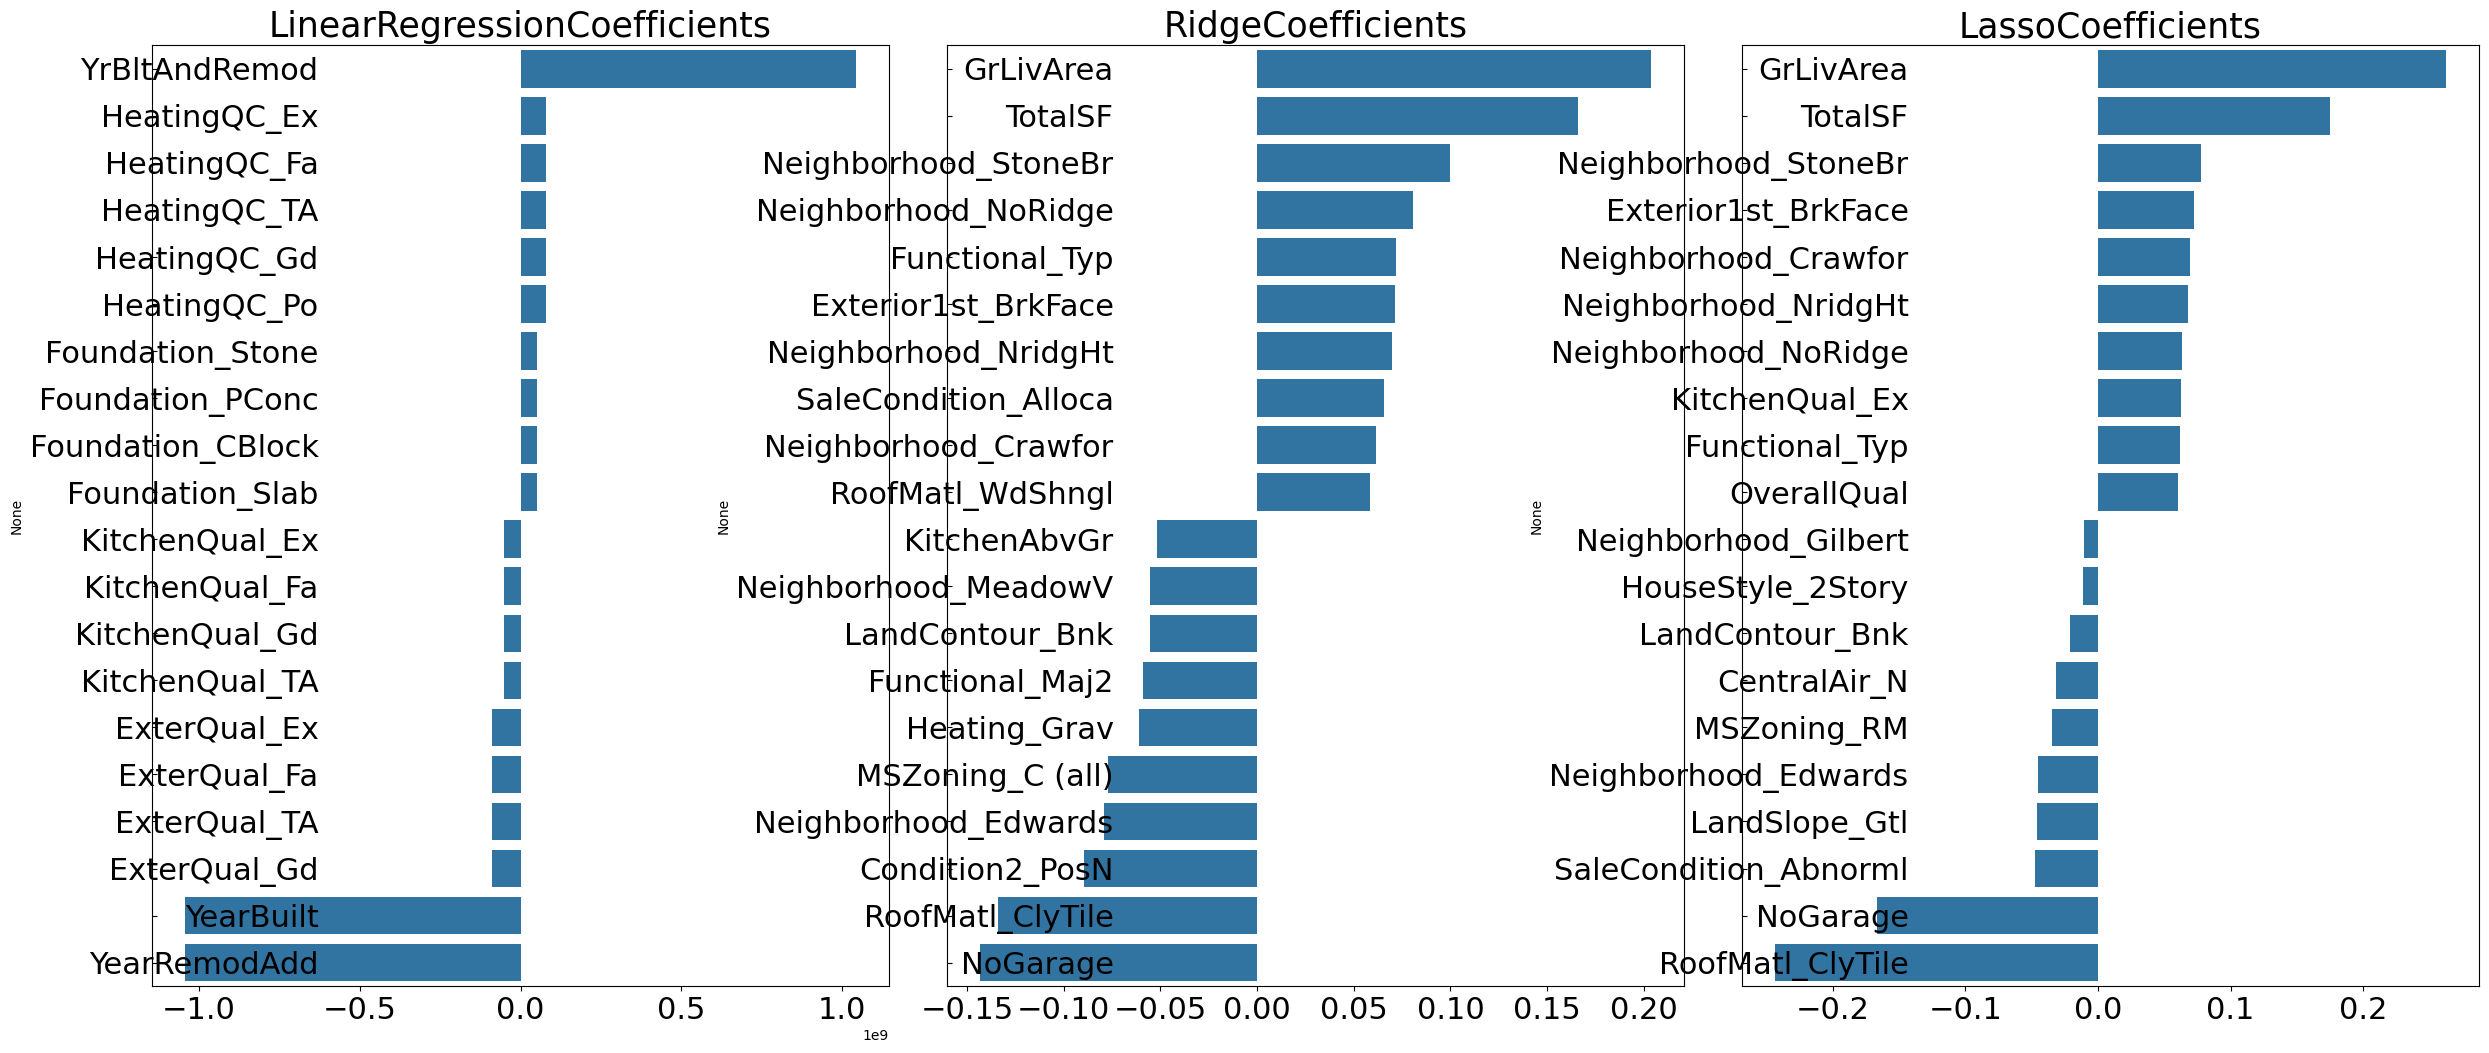

In [57]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)

# 트리기반 모델

In [58]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE 값 : 0.1221, 최적 alpha :{'n_estimators': 1000}


In [59]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=1)

print_best_params(lgbm_reg,lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 158
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2621
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found

# 앙상블

### 회귀모델 앙상블

In [60]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key,rmse))

In [61]:
# 개별 모델 피팅
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출 
pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.13013197222644776
Ridge 모델의 RMSE : 0.1300612510560675
Lasso 모델의 RMSE : 0.13228646099123959


In [62]:
pred = 0.3*ridge_pred + 0.7*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.13051510000021468
Ridge 모델의 RMSE : 0.1300612510560675
Lasso 모델의 RMSE : 0.13228646099123959


In [63]:
pred = 0.2*ridge_pred + 0.8*lasso_pred
preds = {'최종 혼합':pred, 'Ridge': ridge_pred, 'Lasso':lasso_pred}


get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.13100270213465084
Ridge 모델의 RMSE : 0.1300612510560675
Lasso 모델의 RMSE : 0.13228646099123959


### 트리 모델 앙상블

In [64]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambmda=10, n_jobs=1)


xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Unknown parameter: reg_lambmda
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: reg_lambmda
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] Unknown parameter: reg_lambmda
최종혼합 모델의 RMSE : 0.13054169156587803
XGBM 모델의 RMSE : 0.13282211390023668
LGBM 모델의 RMSE : 0.13239874713400798


In [65]:
pred = 0.6*xgb_pred + 0.4*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.13066807745584957
XGBM 모델의 RMSE : 0.13282211390023668
LGBM 모델의 RMSE : 0.13239874713400798


## Optuna를 활용한 하이퍼파라미터 튜닝후 재 앙상블

In [66]:
import optuna

In [67]:
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [68]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-03-15 19:21:19,968] A new study created in memory with name: no-name-f75537af-2393-4501-8c13-e1e8aa8af47b
[I 2024-03-15 19:21:22,348] Trial 0 finished with value: 0.14567530117464086 and parameters: {'learning_rate': 0.011558329418925772, 'max_depth': 3, 'subsample': 0.18593700939240682, 'colsample_bytree': 0.6259714241013792, 'min_child_weight': 19}. Best is trial 0 with value: 0.14567530117464086.
[I 2024-03-15 19:21:23,899] Trial 1 finished with value: 0.1388767678027871 and parameters: {'learning_rate': 0.02147475219040681, 'max_depth': 2, 'subsample': 0.20622527242497346, 'colsample_bytree': 0.1881585379042689, 'min_child_weight': 15}. Best is trial 1 with value: 0.1388767678027871.
[I 2024-03-15 19:21:25,623] Trial 2 finished with value: 0.2400262890991309 and parameters: {'learning_rate': 0.0041780174171750974, 'max_depth': 3, 'subsample': 0.7601346223672795, 'colsample_bytree': 0.15086824843012353, 'min_child_weight': 11}. Best is trial 1 with value: 0.1388767678027871.

In [69]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.05388036386619537, 'max_depth': 3, 'subsample': 0.7708426320602498, 'colsample_bytree': 0.7224992300797889, 'min_child_weight': 2}
Best RMSE: 0.12441159587135162


In [70]:
best_params = study.best_params
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:10.88576
[1]	validation_0-rmse:10.29900
[2]	validation_0-rmse:9.74479
[3]	validation_0-rmse:9.21955
[4]	validation_0-rmse:8.72259
[5]	validation_0-rmse:8.25238
[6]	validation_0-rmse:7.80791
[7]	validation_0-rmse:7.38708
[8]	validation_0-rmse:6.98940
[9]	validation_0-rmse:6.61295
[10]	validation_0-rmse:6.25736
[11]	validation_0-rmse:5.92032
[12]	validation_0-rmse:5.60183
[13]	validation_0-rmse:5.30204
[14]	validation_0-rmse:5.01854
[15]	validation_0-rmse:4.74923
[16]	validation_0-rmse:4.49465
[17]	validation_0-rmse:4.25395
[18]	validation_0-rmse:4.02646
[19]	validation_0-rmse:3.81055
[20]	validation_0-rmse:3.60680
[21]	validation_0-rmse:3.41418
[22]	validation_0-rmse:3.23182
[23]	validation_0-rmse:3.05861
[24]	validation_0-rmse:2.89561
[25]	validation_0-rmse:2.74104
[26]	validation_0-rmse:2.59444
[27]	validation_0-rmse:2.45623
[28]	validation_0-rmse:2.32521
[29]	validation_0-rmse:2.20032
[30]	validation_0-rmse:2.08305
[31]	validation_0-rmse:1.97298
[32]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7224992300797889, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05388036386619537,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
import lightgbm as lgb

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_test, label=y_test)

    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
    }

    model = lgb.train(params, dtrain, valid_sets=[dvalid],  num_boost_round=1000, 
                      callbacks=[lgb.early_stopping(stopping_rounds=50)])
    predictions = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


In [72]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-03-15 19:29:15,929] A new study created in memory with name: no-name-de29f766-8c09-44ce-9824-c2c8f053762c


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:16,426] Trial 0 finished with value: 0.16166360702046034 and parameters: {'learning_rate': 0.004261668852328546, 'max_depth': 10, 'num_leaves': 188, 'subsample': 0.9619886815671853, 'colsample_bytree': 0.21741129650512292, 'min_child_weight': 11, 'reg_alpha': 2.1334905876584576, 'reg_lambda': 1.6994712889593377}. Best is trial 0 with value: 0.16166360702046034.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.161664
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:16,704] Trial 1 finished with value: 0.1356169270890149 and parameters: {'learning_rate': 0.019322658510285178, 'max_depth': 2, 'num_leaves': 93, 'subsample': 0.2936735390883589, 'colsample_bytree': 0.3037316628534196, 'min_child_weight': 8, 'reg_alpha': 0.03770548605902196, 'reg_lambda': 0.001186274052770142}. Best is trial 1 with value: 0.1356169270890149.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.135617
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:16,914] Trial 2 finished with value: 0.13503391529063866 and parameters: {'learning_rate': 0.015998086717395745, 'max_depth': 3, 'num_leaves': 5, 'subsample': 0.22158465493138252, 'colsample_bytree': 0.4204827564134981, 'min_child_weight': 11, 'reg_alpha': 0.02570403768957527, 'reg_lambda': 2.4472709777776434}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[984]	valid_0's rmse: 0.135034
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:17,559] Trial 3 finished with value: 0.20690190095906552 and parameters: {'learning_rate': 0.0016307267531641618, 'max_depth': 8, 'num_leaves': 89, 'subsample': 0.3312872063477911, 'colsample_bytree': 0.1662507806615397, 'min_child_weight': 6, 'reg_alpha': 0.042203713909743396, 'reg_lambda': 0.7307849285922676}. Best is trial 2 with value: 0.13503391529063866.
[I 2024-03-15 19:29:17,677] Trial 4 finished with value: 0.23188559309127438 and parameters: {'learning_rate': 0.0028506330049711134, 'max_depth': 1, 'num_leaves': 178, 'subsample': 0.5988220070297877, 'colsample_bytree': 0.8808812293152953, 'min_child_weight': 13, 'reg_alpha': 0.01249575418333741, 'reg_lambda': 0.3186732623665254}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.206902
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.231886
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:18,095] Trial 5 finished with value: 0.1377497347661119 and parameters: {'learning_rate': 0.023020604297469206, 'max_depth': 8, 'num_leaves': 250, 'subsample': 0.09371573421896179, 'colsample_bytree': 0.5645911227193486, 'min_child_weight': 1, 'reg_alpha': 0.04076451567767842, 'reg_lambda': 0.09019464420366255}. Best is trial 2 with value: 0.13503391529063866.


Early stopping, best iteration is:
[660]	valid_0's rmse: 0.13775
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:18,823] Trial 6 finished with value: 0.13554391667509916 and parameters: {'learning_rate': 0.009517556089681509, 'max_depth': 8, 'num_leaves': 36, 'subsample': 0.4376870971777334, 'colsample_bytree': 0.3488323344111889, 'min_child_weight': 4, 'reg_alpha': 0.00951113429392648, 'reg_lambda': 0.0012405919837787695}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[996]	valid_0's rmse: 0.135544
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:19,190] Trial 7 finished with value: 0.22488522468650546 and parameters: {'learning_rate': 0.0016428376312651448, 'max_depth': 8, 'num_leaves': 190, 'subsample': 0.9872729565896434, 'colsample_bytree': 0.23995200507949455, 'min_child_weight': 8, 'reg_alpha': 3.569686279885752, 'reg_lambda': 0.00373694587855672}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.224885
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:20,103] Trial 8 finished with value: 0.19489545428511543 and parameters: {'learning_rate': 0.001466633659985918, 'max_depth': 9, 'num_leaves': 122, 'subsample': 0.97476350187345, 'colsample_bytree': 0.638519255025407, 'min_child_weight': 17, 'reg_alpha': 0.0024896205195776284, 'reg_lambda': 0.004835297278304385}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.194895
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:20,667] Trial 9 finished with value: 0.1839850474251142 and parameters: {'learning_rate': 0.002688289797311924, 'max_depth': 9, 'num_leaves': 199, 'subsample': 0.13769152320379371, 'colsample_bytree': 0.07713798392362534, 'min_child_weight': 9, 'reg_alpha': 0.09447386524731947, 'reg_lambda': 0.0012038176367422501}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.183985
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:20,833] Trial 10 finished with value: 0.13566306333794156 and parameters: {'learning_rate': 0.0855065346414227, 'max_depth': 4, 'num_leaves': 5, 'subsample': 0.663824204304596, 'colsample_bytree': 0.7312004696317613, 'min_child_weight': 20, 'reg_alpha': 0.646273743354805, 'reg_lambda': 6.666673905432373}. Best is trial 2 with value: 0.13503391529063866.


Early stopping, best iteration is:
[551]	valid_0's rmse: 0.135663
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.161955


[I 2024-03-15 19:29:21,031] Trial 11 finished with value: 0.16195536292916543 and parameters: {'learning_rate': 0.00960619190342272, 'max_depth': 5, 'num_leaves': 2, 'subsample': 0.4343061155763348, 'colsample_bytree': 0.3982459624701709, 'min_child_weight': 3, 'reg_alpha': 0.0010627065863496384, 'reg_lambda': 0.024073614798308718}. Best is trial 2 with value: 0.13503391529063866.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.136956


[I 2024-03-15 19:29:21,307] Trial 12 finished with value: 0.13695582961154298 and parameters: {'learning_rate': 0.011094036203218386, 'max_depth': 3, 'num_leaves': 48, 'subsample': 0.2526442948338129, 'colsample_bytree': 0.432861949889554, 'min_child_weight': 14, 'reg_alpha': 0.010400240884263142, 'reg_lambda': 9.434247888520726}. Best is trial 2 with value: 0.13503391529063866.
[I 2024-03-15 19:29:21,504] Trial 13 finished with value: 0.13687781465694418 and parameters: {'learning_rate': 0.053862645102671566, 'max_depth': 6, 'num_leaves': 41, 'subsample': 0.44181959480853006, 'colsample_bytree': 0.43250282296186293, 'min_child_weight': 5, 'reg_alpha': 0.39115102721678807, 'reg_lambda': 0.0659528172900297}. Best is trial 2 with value: 0.13503391529063866.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[256]	valid_0's rmse: 0.136878
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:22,010] Trial 14 finished with value: 0.1362007460143061 and parameters: {'learning_rate': 0.0073552281678895435, 'max_depth': 6, 'num_leaves': 46, 'subsample': 0.7563986549837927, 'colsample_bytree': 0.3414115113153807, 'min_child_weight': 13, 'reg_alpha': 0.005929574222911689, 'reg_lambda': 0.017549647830116807}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.136201
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:22,266] Trial 15 finished with value: 0.1367636654638474 and parameters: {'learning_rate': 0.02571996245161417, 'max_depth': 4, 'num_leaves': 76, 'subsample': 0.20385706755138583, 'colsample_bytree': 0.5289824215116544, 'min_child_weight': 1, 'reg_alpha': 0.24824439229742704, 'reg_lambda': 0.4313574428950439}. Best is trial 2 with value: 0.13503391529063866.


Early stopping, best iteration is:
[699]	valid_0's rmse: 0.136764
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:22,509] Trial 16 finished with value: 0.13869886061897194 and parameters: {'learning_rate': 0.03864823880256649, 'max_depth': 7, 'num_leaves': 24, 'subsample': 0.4189247100166871, 'colsample_bytree': 0.7449065953166174, 'min_child_weight': 5, 'reg_alpha': 0.004628042546222115, 'reg_lambda': 0.9897792306284432}. Best is trial 2 with value: 0.13503391529063866.


Early stopping, best iteration is:
[399]	valid_0's rmse: 0.138699
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:22,730] Trial 17 finished with value: 0.18733008569026316 and parameters: {'learning_rate': 0.013523075271104601, 'max_depth': 1, 'num_leaves': 130, 'subsample': 0.5319368997967315, 'colsample_bytree': 0.06957333977732777, 'min_child_weight': 11, 'reg_alpha': 9.457503642097832, 'reg_lambda': 2.621631802171895}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.18733
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:23,150] Trial 18 finished with value: 0.144851046675659 and parameters: {'learning_rate': 0.005398794184407904, 'max_depth': 4, 'num_leaves': 67, 'subsample': 0.7768623821858236, 'colsample_bytree': 0.9992878744929801, 'min_child_weight': 16, 'reg_alpha': 0.02132725658305496, 'reg_lambda': 0.22466512782375647}. Best is trial 2 with value: 0.13503391529063866.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.144851
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:23,428] Trial 19 finished with value: 0.13603106578391003 and parameters: {'learning_rate': 0.017545954187324377, 'max_depth': 3, 'num_leaves': 119, 'subsample': 0.3598951018085646, 'colsample_bytree': 0.6293190045120102, 'min_child_weight': 3, 'reg_alpha': 0.10925774423140408, 'reg_lambda': 0.026130530585341365}. Best is trial 2 with value: 0.13503391529063866.


Early stopping, best iteration is:
[828]	valid_0's rmse: 0.136031
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:23,662] Trial 20 finished with value: 0.13552357994330116 and parameters: {'learning_rate': 0.03324961857241413, 'max_depth': 5, 'num_leaves': 26, 'subsample': 0.1919601358433011, 'colsample_bytree': 0.47422400705093903, 'min_child_weight': 10, 'reg_alpha': 0.0010217212931391793, 'reg_lambda': 0.005486349834037927}. Best is trial 2 with value: 0.13503391529063866.


Early stopping, best iteration is:
[456]	valid_0's rmse: 0.135524
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[438]	valid_0's rmse: 0.137135


[I 2024-03-15 19:29:23,863] Trial 21 finished with value: 0.13713539365483843 and parameters: {'learning_rate': 0.038279622819775004, 'max_depth': 5, 'num_leaves': 24, 'subsample': 0.1799982549837434, 'colsample_bytree': 0.436303960527215, 'min_child_weight': 10, 'reg_alpha': 0.0012454729176519497, 'reg_lambda': 0.004203152959787948}. Best is trial 2 with value: 0.13503391529063866.
[I 2024-03-15 19:29:24,108] Trial 22 finished with value: 0.13275671680607246 and parameters: {'learning_rate': 0.03874256161165518, 'max_depth': 7, 'num_leaves': 21, 'subsample': 0.0642773513606846, 'colsample_bytree': 0.32077277402940046, 'min_child_weight': 7, 'reg_alpha': 0.0033114923843309625, 'reg_lambda': 0.010342534581074881}. Best is trial 22 with value: 0.13275671680607246.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[446]	valid_0's rmse: 0.132757


[I 2024-03-15 19:29:24,244] Trial 23 finished with value: 0.13646089541379391 and parameters: {'learning_rate': 0.08681303458597826, 'max_depth': 6, 'num_leaves': 11, 'subsample': 0.09076251963195517, 'colsample_bytree': 0.5124447481904949, 'min_child_weight': 7, 'reg_alpha': 0.002557482177933571, 'reg_lambda': 0.010194664059716906}. Best is trial 22 with value: 0.13275671680607246.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[135]	valid_0's rmse: 0.136461
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:24,456] Trial 24 finished with value: 0.13284235636712916 and parameters: {'learning_rate': 0.035169484654534296, 'max_depth': 3, 'num_leaves': 70, 'subsample': 0.05094538610464178, 'colsample_bytree': 0.2587811032608076, 'min_child_weight': 12, 'reg_alpha': 0.002432201396255303, 'reg_lambda': 0.04889670753059608}. Best is trial 22 with value: 0.13275671680607246.
[I 2024-03-15 19:29:24,582] Trial 25 finished with value: 0.13459594565975777 and parameters: {'learning_rate': 0.07080134983561599, 'max_depth': 2, 'num_leaves': 58, 'subsample': 0.05221260983124332, 'colsample_bytree': 0.28554785395818866, 'min_child_weight': 15, 'reg_alpha': 0.003173201962387376, 'reg_lambda': 0.05708886749133454}. Best is trial 22 with value: 0.13275671680607246.


Early stopping, best iteration is:
[563]	valid_0's rmse: 0.132842
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[327]	valid_0's rmse: 0.134596
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:24,793] Trial 26 finished with value: 0.13372070368182226 and parameters: {'learning_rate': 0.05798758631862502, 'max_depth': 2, 'num_leaves': 59, 'subsample': 0.054516608463272595, 'colsample_bytree': 0.16033062800236625, 'min_child_weight': 17, 'reg_alpha': 0.002635449240691763, 'reg_lambda': 0.04494010681298615}. Best is trial 22 with value: 0.13275671680607246.


Early stopping, best iteration is:
[730]	valid_0's rmse: 0.133721
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[739]	valid_0's rmse: 0.133524


[I 2024-03-15 19:29:24,977] Trial 27 finished with value: 0.13352356644941044 and parameters: {'learning_rate': 0.05768642896625006, 'max_depth': 2, 'num_leaves': 105, 'subsample': 0.05233468682458427, 'colsample_bytree': 0.14517278246187748, 'min_child_weight': 19, 'reg_alpha': 0.0017680168699544816, 'reg_lambda': 0.04389518989413492}. Best is trial 22 with value: 0.13275671680607246.
[I 2024-03-15 19:29:25,157] Trial 28 finished with value: 0.13719988923593282 and parameters: {'learning_rate': 0.04943580466203708, 'max_depth': 7, 'num_leaves': 143, 'subsample': 0.1483883429447584, 'colsample_bytree': 0.1577596649362891, 'min_child_weight': 20, 'reg_alpha': 0.005831897594416478, 'reg_lambda': 0.13653344011345755}. Best is trial 22 with value: 0.13275671680607246.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 0.1372
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:25,448] Trial 29 finished with value: 0.13436681714093834 and parameters: {'learning_rate': 0.028542872593977673, 'max_depth': 10, 'num_leaves': 101, 'subsample': 0.13412053322222345, 'colsample_bytree': 0.2080423397853598, 'min_child_weight': 18, 'reg_alpha': 0.0015889139345532425, 'reg_lambda': 0.013794747283089017}. Best is trial 22 with value: 0.13275671680607246.
[I 2024-03-15 19:29:25,612] Trial 30 finished with value: 0.14137251924372674 and parameters: {'learning_rate': 0.09610002155346785, 'max_depth': 1, 'num_leaves': 164, 'subsample': 0.2687810803985733, 'colsample_bytree': 0.10474212826401216, 'min_child_weight': 13, 'reg_alpha': 0.014726393205866039, 'reg_lambda': 0.14812242457671795}. Best is trial 22 with value: 0.13275671680607246.


Early stopping, best iteration is:
[319]	valid_0's rmse: 0.134367
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.141373


[I 2024-03-15 19:29:25,743] Trial 31 finished with value: 0.1334287988273592 and parameters: {'learning_rate': 0.06341243922050127, 'max_depth': 2, 'num_leaves': 77, 'subsample': 0.09440190742322493, 'colsample_bytree': 0.23247636864649146, 'min_child_weight': 19, 'reg_alpha': 0.0020769978348484726, 'reg_lambda': 0.04052505146461074}. Best is trial 22 with value: 0.13275671680607246.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[462]	valid_0's rmse: 0.133429
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:25,909] Trial 32 finished with value: 0.13406037460317452 and parameters: {'learning_rate': 0.05101185257670355, 'max_depth': 2, 'num_leaves': 100, 'subsample': 0.11038021901892844, 'colsample_bytree': 0.24014609924139055, 'min_child_weight': 19, 'reg_alpha': 0.00476127169442654, 'reg_lambda': 0.033855612635883506}. Best is trial 22 with value: 0.13275671680607246.
[I 2024-03-15 19:29:26,036] Trial 33 finished with value: 0.13434708945327714 and parameters: {'learning_rate': 0.06838470102045882, 'max_depth': 3, 'num_leaves': 79, 'subsample': 0.8799408024940758, 'colsample_bytree': 0.29120770173529364, 'min_child_weight': 18, 'reg_alpha': 0.002060417792616175, 'reg_lambda': 0.008144893150541009}. Best is trial 22 with value: 0.13275671680607246.


Early stopping, best iteration is:
[647]	valid_0's rmse: 0.13406
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[225]	valid_0's rmse: 0.134347
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:26,211] Trial 34 finished with value: 0.1341036286715291 and parameters: {'learning_rate': 0.03730429190404625, 'max_depth': 2, 'num_leaves': 105, 'subsample': 0.057433397377029675, 'colsample_bytree': 0.20639045278946463, 'min_child_weight': 16, 'reg_alpha': 0.0036717408355318487, 'reg_lambda': 0.09316334147611831}. Best is trial 22 with value: 0.13275671680607246.


Early stopping, best iteration is:
[681]	valid_0's rmse: 0.134104
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:26,444] Trial 35 finished with value: 0.13237042921015257 and parameters: {'learning_rate': 0.02317401655758137, 'max_depth': 3, 'num_leaves': 81, 'subsample': 0.32222758117096406, 'colsample_bytree': 0.3463159081391122, 'min_child_weight': 7, 'reg_alpha': 0.006996102031495233, 'reg_lambda': 0.03559348619044693}. Best is trial 35 with value: 0.13237042921015257.


Early stopping, best iteration is:
[690]	valid_0's rmse: 0.13237
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:26,736] Trial 36 finished with value: 0.13179937146842133 and parameters: {'learning_rate': 0.021994295836851356, 'max_depth': 3, 'num_leaves': 79, 'subsample': 0.3035962664875983, 'colsample_bytree': 0.3439418948529175, 'min_child_weight': 8, 'reg_alpha': 0.006222952920506745, 'reg_lambda': 0.002464983735324515}. Best is trial 36 with value: 0.13179937146842133.


Did not meet early stopping. Best iteration is:
[985]	valid_0's rmse: 0.131799
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:27,012] Trial 37 finished with value: 0.13351293298245828 and parameters: {'learning_rate': 0.02248317825284173, 'max_depth': 4, 'num_leaves': 83, 'subsample': 0.3305158492910508, 'colsample_bytree': 0.3782820567930648, 'min_child_weight': 7, 'reg_alpha': 0.024664158736180407, 'reg_lambda': 0.0023583771733635276}. Best is trial 36 with value: 0.13179937146842133.


Early stopping, best iteration is:
[738]	valid_0's rmse: 0.133513
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:27,537] Trial 38 finished with value: 0.13384329886220997 and parameters: {'learning_rate': 0.014605838972665257, 'max_depth': 7, 'num_leaves': 61, 'subsample': 0.3089772738324013, 'colsample_bytree': 0.3282626799983183, 'min_child_weight': 8, 'reg_alpha': 0.007394007771569866, 'reg_lambda': 0.0019845736819173987}. Best is trial 36 with value: 0.13179937146842133.


Early stopping, best iteration is:
[677]	valid_0's rmse: 0.133843
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:27,829] Trial 39 finished with value: 0.13323481167089637 and parameters: {'learning_rate': 0.018810615243041607, 'max_depth': 3, 'num_leaves': 145, 'subsample': 0.5193373745489526, 'colsample_bytree': 0.2668094145329689, 'min_child_weight': 12, 'reg_alpha': 0.06684949813568927, 'reg_lambda': 0.009465172869120003}. Best is trial 36 with value: 0.13179937146842133.


Did not meet early stopping. Best iteration is:
[974]	valid_0's rmse: 0.133235
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:28,074] Trial 40 finished with value: 0.13445129207723933 and parameters: {'learning_rate': 0.029302898811771887, 'max_depth': 4, 'num_leaves': 87, 'subsample': 0.34683242288391786, 'colsample_bytree': 0.3664225132608147, 'min_child_weight': 9, 'reg_alpha': 0.013385700173084051, 'reg_lambda': 0.0029774446556405988}. Best is trial 36 with value: 0.13179937146842133.


Early stopping, best iteration is:
[616]	valid_0's rmse: 0.134451
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:28,339] Trial 41 finished with value: 0.13277354386185602 and parameters: {'learning_rate': 0.020448775965889357, 'max_depth': 3, 'num_leaves': 156, 'subsample': 0.5641365234778511, 'colsample_bytree': 0.28968684998285277, 'min_child_weight': 11, 'reg_alpha': 0.04585805961001931, 'reg_lambda': 0.007302286092014393}. Best is trial 36 with value: 0.13179937146842133.


Early stopping, best iteration is:
[862]	valid_0's rmse: 0.132774
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:28,616] Trial 42 finished with value: 0.13156433349540494 and parameters: {'learning_rate': 0.02046996199813773, 'max_depth': 3, 'num_leaves': 216, 'subsample': 0.612445958706247, 'colsample_bytree': 0.29974725530310636, 'min_child_weight': 6, 'reg_alpha': 0.04407405777462847, 'reg_lambda': 0.006314603213005609}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[915]	valid_0's rmse: 0.131564
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.144805


[I 2024-03-15 19:29:28,819] Trial 43 finished with value: 0.14480501930267276 and parameters: {'learning_rate': 0.02274151495303106, 'max_depth': 1, 'num_leaves': 240, 'subsample': 0.661076761922496, 'colsample_bytree': 0.3231455748629183, 'min_child_weight': 6, 'reg_alpha': 0.04691848503849559, 'reg_lambda': 0.006120470473735097}. Best is trial 42 with value: 0.13156433349540494.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:29,131] Trial 44 finished with value: 0.13543145086599886 and parameters: {'learning_rate': 0.012036337967382368, 'max_depth': 3, 'num_leaves': 221, 'subsample': 0.5854133201496192, 'colsample_bytree': 0.48697527331852297, 'min_child_weight': 7, 'reg_alpha': 0.17288248887736238, 'reg_lambda': 0.0017040511041624257}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.135431
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:29,490] Trial 45 finished with value: 0.13368610945192325 and parameters: {'learning_rate': 0.01723317751434301, 'max_depth': 5, 'num_leaves': 209, 'subsample': 0.5006231883258082, 'colsample_bytree': 0.32400844682543567, 'min_child_weight': 9, 'reg_alpha': 0.030853190648621794, 'reg_lambda': 0.014232329699939945}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[742]	valid_0's rmse: 0.133686
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:29,843] Trial 46 finished with value: 0.13450415420361825 and parameters: {'learning_rate': 0.020053228078017148, 'max_depth': 4, 'num_leaves': 169, 'subsample': 0.6510363323902272, 'colsample_bytree': 0.4015729088203725, 'min_child_weight': 6, 'reg_alpha': 0.8347321244272545, 'reg_lambda': 0.02002607580933414}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.134504
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:30,412] Trial 47 finished with value: 0.1359142283133928 and parameters: {'learning_rate': 0.008467187521966471, 'max_depth': 3, 'num_leaves': 155, 'subsample': 0.5875734076425941, 'colsample_bytree': 0.37279511319198066, 'min_child_weight': 8, 'reg_alpha': 0.019953362571938596, 'reg_lambda': 0.0010588323875703582}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.135914
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:30,752] Trial 48 finished with value: 0.13587598120936734 and parameters: {'learning_rate': 0.04563631959293969, 'max_depth': 9, 'num_leaves': 241, 'subsample': 0.7258329063615572, 'colsample_bytree': 0.572967688739889, 'min_child_weight': 5, 'reg_alpha': 0.056908703498588904, 'reg_lambda': 0.003709705873611872}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[352]	valid_0's rmse: 0.135876
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:31,136] Trial 49 finished with value: 0.1392036031286149 and parameters: {'learning_rate': 0.006348561276934053, 'max_depth': 4, 'num_leaves': 198, 'subsample': 0.3780122862244256, 'colsample_bytree': 0.453328236492624, 'min_child_weight': 9, 'reg_alpha': 0.008750521382414132, 'reg_lambda': 0.007643149661832374}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.139204
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:31,446] Trial 50 finished with value: 0.13425220996476386 and parameters: {'learning_rate': 0.027055864175792293, 'max_depth': 7, 'num_leaves': 219, 'subsample': 0.47682910050675087, 'colsample_bytree': 0.20041326156165895, 'min_child_weight': 4, 'reg_alpha': 0.015937536927358477, 'reg_lambda': 0.011731881110024454}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[558]	valid_0's rmse: 0.134252
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[647]	valid_0's rmse: 0.13371


[I 2024-03-15 19:29:31,635] Trial 51 finished with value: 0.13371000397164448 and parameters: {'learning_rate': 0.03168365587892502, 'max_depth': 3, 'num_leaves': 120, 'subsample': 0.5414244986191228, 'colsample_bytree': 0.2642471137957594, 'min_child_weight': 11, 'reg_alpha': 0.09633155898370677, 'reg_lambda': 0.02810819787706056}. Best is trial 42 with value: 0.13156433349540494.
[I 2024-03-15 19:29:31,880] Trial 52 finished with value: 0.13493335465969397 and parameters: {'learning_rate': 0.04173522756498502, 'max_depth': 3, 'num_leaves': 181, 'subsample': 0.2646438110943644, 'colsample_bytree': 0.12314896572014672, 'min_child_weight': 12, 'reg_alpha': 0.03436898952750747, 'reg_lambda': 0.002931219651079827}. Best is trial 42 with value: 0.13156433349540494.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[636]	valid_0's rmse: 0.134933
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.132817


[I 2024-03-15 19:29:32,161] Trial 53 finished with value: 0.13281690924429831 and parameters: {'learning_rate': 0.013825107450282946, 'max_depth': 3, 'num_leaves': 50, 'subsample': 0.22734402611061363, 'colsample_bytree': 0.3022168465825947, 'min_child_weight': 8, 'reg_alpha': 0.004129149738672438, 'reg_lambda': 0.0056836937939225025}. Best is trial 42 with value: 0.13156433349540494.


Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:32,715] Trial 54 finished with value: 0.13446782182414022 and parameters: {'learning_rate': 0.01274183153010757, 'max_depth': 5, 'num_leaves': 35, 'subsample': 0.22880972821556728, 'colsample_bytree': 0.4032254627886468, 'min_child_weight': 8, 'reg_alpha': 0.007832099805083426, 'reg_lambda': 0.00564635613916836}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[991]	valid_0's rmse: 0.134468
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:33,053] Trial 55 finished with value: 0.13450412049711302 and parameters: {'learning_rate': 0.010167670008285225, 'max_depth': 4, 'num_leaves': 15, 'subsample': 0.40207153818603936, 'colsample_bytree': 0.3020405613154964, 'min_child_weight': 6, 'reg_alpha': 0.004249478998019805, 'reg_lambda': 0.0016931834733481146}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.134504
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:33,291] Trial 56 finished with value: 0.1373098274194934 and parameters: {'learning_rate': 0.01474522274223315, 'max_depth': 2, 'num_leaves': 46, 'subsample': 0.4657734484855711, 'colsample_bytree': 0.35450057307757477, 'min_child_weight': 10, 'reg_alpha': 0.15155565498344503, 'reg_lambda': 0.017730467041713948}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.13731
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:33,820] Trial 57 finished with value: 0.13205769777274548 and parameters: {'learning_rate': 0.022568856844767046, 'max_depth': 8, 'num_leaves': 52, 'subsample': 0.23266961819028598, 'colsample_bytree': 0.30546725038285805, 'min_child_weight': 4, 'reg_alpha': 0.011154117091971423, 'reg_lambda': 0.004222403216927789}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[822]	valid_0's rmse: 0.132058
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:34,221] Trial 58 finished with value: 0.136563021685748 and parameters: {'learning_rate': 0.024595627840107895, 'max_depth': 8, 'num_leaves': 90, 'subsample': 0.292910613099113, 'colsample_bytree': 0.1966377278900379, 'min_child_weight': 2, 'reg_alpha': 0.011341355352146802, 'reg_lambda': 0.0041027532853997245}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[602]	valid_0's rmse: 0.136563
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:34,726] Trial 59 finished with value: 0.13447107748202128 and parameters: {'learning_rate': 0.02012880991117834, 'max_depth': 8, 'num_leaves': 33, 'subsample': 0.6316603417686266, 'colsample_bytree': 0.4160244895913941, 'min_child_weight': 3, 'reg_alpha': 0.02000789862353273, 'reg_lambda': 0.007648432448513536}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[730]	valid_0's rmse: 0.134471
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:35,873] Trial 60 finished with value: 0.13769528358846458 and parameters: {'learning_rate': 0.016641367369987562, 'max_depth': 8, 'num_leaves': 113, 'subsample': 0.7077493178914246, 'colsample_bytree': 0.5684475136305851, 'min_child_weight': 4, 'reg_alpha': 0.06404599687763284, 'reg_lambda': 0.0028731802258177086}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[827]	valid_0's rmse: 0.137695
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:36,175] Trial 61 finished with value: 0.13291661569480379 and parameters: {'learning_rate': 0.020553553769092944, 'max_depth': 6, 'num_leaves': 51, 'subsample': 0.22263623717707973, 'colsample_bytree': 0.3107245935406681, 'min_child_weight': 7, 'reg_alpha': 0.005877760307514217, 'reg_lambda': 0.005784177365128654}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[506]	valid_0's rmse: 0.132917
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:36,630] Trial 62 finished with value: 0.13337860403240775 and parameters: {'learning_rate': 0.02578761306710375, 'max_depth': 9, 'num_leaves': 130, 'subsample': 0.1585195113377228, 'colsample_bytree': 0.2727865465346457, 'min_child_weight': 5, 'reg_alpha': 0.006853243695938559, 'reg_lambda': 0.0014541768599244422}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[651]	valid_0's rmse: 0.133379
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:36,982] Trial 63 finished with value: 0.15622623342460942 and parameters: {'learning_rate': 0.0034083726660730216, 'max_depth': 3, 'num_leaves': 67, 'subsample': 0.2435932288728407, 'colsample_bytree': 0.3468333901989431, 'min_child_weight': 7, 'reg_alpha': 0.0032950774854371406, 'reg_lambda': 0.0041593866338266155}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.156226
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:37,602] Trial 64 finished with value: 0.23223131096014762 and parameters: {'learning_rate': 0.0011493911815301276, 'max_depth': 7, 'num_leaves': 17, 'subsample': 0.2021466177285976, 'colsample_bytree': 0.2519137146548568, 'min_child_weight': 6, 'reg_alpha': 0.009935110379342001, 'reg_lambda': 0.01340947799428232}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.232231
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:37,891] Trial 65 finished with value: 0.1363218069631279 and parameters: {'learning_rate': 0.01575149342238388, 'max_depth': 2, 'num_leaves': 40, 'subsample': 0.39156750233360116, 'colsample_bytree': 0.3868445669556268, 'min_child_weight': 8, 'reg_alpha': 0.004460550773122119, 'reg_lambda': 0.0023775575939920315}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.136322
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:38,184] Trial 66 finished with value: 0.141655852809103 and parameters: {'learning_rate': 0.03256592694638911, 'max_depth': 10, 'num_leaves': 57, 'subsample': 0.5530233551231097, 'colsample_bytree': 0.1822850832125052, 'min_child_weight': 4, 'reg_alpha': 0.0013460859550605672, 'reg_lambda': 0.007021960551094597}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[347]	valid_0's rmse: 0.141656
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:38,449] Trial 67 finished with value: 0.13412573016157162 and parameters: {'learning_rate': 0.011172228004177134, 'max_depth': 3, 'num_leaves': 27, 'subsample': 0.2998139968463227, 'colsample_bytree': 0.29935102524445306, 'min_child_weight': 9, 'reg_alpha': 0.015192366383192789, 'reg_lambda': 0.009308585628574048}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.134126
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:38,686] Trial 68 finished with value: 0.16586882755969123 and parameters: {'learning_rate': 0.00840431395204783, 'max_depth': 1, 'num_leaves': 51, 'subsample': 0.17733225216505766, 'colsample_bytree': 0.22529892427503093, 'min_child_weight': 11, 'reg_alpha': 0.04385226277203669, 'reg_lambda': 0.0707849370016957}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.165869
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:39,159] Trial 69 finished with value: 0.1396207040311084 and parameters: {'learning_rate': 0.013672407864491885, 'max_depth': 4, 'num_leaves': 71, 'subsample': 0.12349503683186841, 'colsample_bytree': 0.7661351703098819, 'min_child_weight': 2, 'reg_alpha': 0.027082980621068828, 'reg_lambda': 0.018697390536071327}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[969]	valid_0's rmse: 0.139621
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:39,515] Trial 70 finished with value: 0.13406594266818178 and parameters: {'learning_rate': 0.021369942580085035, 'max_depth': 6, 'num_leaves': 4, 'subsample': 0.2755009236679185, 'colsample_bytree': 0.4459294589440097, 'min_child_weight': 10, 'reg_alpha': 0.0030613489403270785, 'reg_lambda': 0.004365289436231224}. Best is trial 42 with value: 0.13156433349540494.
[I 2024-03-15 19:29:39,688] Trial 71 finished with value: 0.1331139983289456 and parameters: {'learning_rate': 0.03578290060409034, 'max_depth': 3, 'num_leaves': 96, 'subsample': 0.08477231976796487, 'colsample_bytree': 0.34490519548476195, 'min_child_weight': 12, 'reg_alpha': 0.0023028594646921736, 'reg_lambda': 0.025138328635738998}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[980]	valid_0's rmse: 0.134066
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[388]	valid_0's rmse: 0.133114


[I 2024-03-15 19:29:39,897] Trial 72 finished with value: 0.13514432445612093 and parameters: {'learning_rate': 0.028264206838126627, 'max_depth': 2, 'num_leaves': 74, 'subsample': 0.6155560724992423, 'colsample_bytree': 0.2746841947780776, 'min_child_weight': 6, 'reg_alpha': 0.005388851532580142, 'reg_lambda': 0.0555918912803891}. Best is trial 42 with value: 0.13156433349540494.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[831]	valid_0's rmse: 0.135144
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:40,279] Trial 73 finished with value: 0.1353163270833119 and parameters: {'learning_rate': 0.04379968301174722, 'max_depth': 9, 'num_leaves': 63, 'subsample': 0.16223205866360102, 'colsample_bytree': 0.24105603119227156, 'min_child_weight': 14, 'reg_alpha': 0.0016148720826363464, 'reg_lambda': 0.1506888823585595}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[322]	valid_0's rmse: 0.135316
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:40,628] Trial 74 finished with value: 0.13309813723223063 and parameters: {'learning_rate': 0.023541942527538218, 'max_depth': 4, 'num_leaves': 53, 'subsample': 0.32916092286280313, 'colsample_bytree': 0.2951590083513303, 'min_child_weight': 8, 'reg_alpha': 0.0040016619870811825, 'reg_lambda': 0.0032975240612694843}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[735]	valid_0's rmse: 0.133098
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:40,930] Trial 75 finished with value: 0.13279806757096246 and parameters: {'learning_rate': 0.018414264843628673, 'max_depth': 3, 'num_leaves': 68, 'subsample': 0.10843294476766371, 'colsample_bytree': 0.36260560575687995, 'min_child_weight': 13, 'reg_alpha': 0.010958419301292148, 'reg_lambda': 0.011365254633340562}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[903]	valid_0's rmse: 0.132798
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:41,205] Trial 76 finished with value: 0.13238067346357862 and parameters: {'learning_rate': 0.01849145259891192, 'max_depth': 3, 'num_leaves': 85, 'subsample': 0.10993674060679659, 'colsample_bytree': 0.3328506099439128, 'min_child_weight': 5, 'reg_alpha': 0.00818105453779881, 'reg_lambda': 0.011892909010379435}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[826]	valid_0's rmse: 0.132381
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:41,459] Trial 77 finished with value: 0.13634613748204136 and parameters: {'learning_rate': 0.018543131694780328, 'max_depth': 2, 'num_leaves': 83, 'subsample': 0.10765858375524354, 'colsample_bytree': 0.4662339622212926, 'min_child_weight': 13, 'reg_alpha': 0.011435811385615289, 'reg_lambda': 0.010381021145462134}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[991]	valid_0's rmse: 0.136346
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:41,762] Trial 78 finished with value: 0.1364544995012272 and parameters: {'learning_rate': 0.016262711908361746, 'max_depth': 4, 'num_leaves': 137, 'subsample': 0.07691473849263514, 'colsample_bytree': 0.4942623659875712, 'min_child_weight': 5, 'reg_alpha': 0.008679723459035477, 'reg_lambda': 0.03554966192430027}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[803]	valid_0's rmse: 0.136455
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:42,015] Trial 79 finished with value: 0.13301095232616353 and parameters: {'learning_rate': 0.030213288918278538, 'max_depth': 3, 'num_leaves': 110, 'subsample': 0.12667417465703024, 'colsample_bytree': 0.366024947815447, 'min_child_weight': 5, 'reg_alpha': 0.020007866796623492, 'reg_lambda': 0.01506970314530223}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[737]	valid_0's rmse: 0.133011
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:42,243] Trial 80 finished with value: 0.1357359490241798 and parameters: {'learning_rate': 0.025010939192681148, 'max_depth': 2, 'num_leaves': 94, 'subsample': 0.1420459319911841, 'colsample_bytree': 0.415536239964317, 'min_child_weight': 4, 'reg_alpha': 0.34395563707193727, 'reg_lambda': 0.010913133498393242}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.135736
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:42,483] Trial 81 finished with value: 0.13318021411277406 and parameters: {'learning_rate': 0.01903778953233913, 'max_depth': 3, 'num_leaves': 43, 'subsample': 0.20980542453950254, 'colsample_bytree': 0.32856319813312396, 'min_child_weight': 14, 'reg_alpha': 0.005374930676162895, 'reg_lambda': 0.004842119782146328}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[720]	valid_0's rmse: 0.13318
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:42,846] Trial 82 finished with value: 0.13301174865443224 and parameters: {'learning_rate': 0.014098733277242446, 'max_depth': 3, 'num_leaves': 83, 'subsample': 0.16920358774951225, 'colsample_bytree': 0.31710810852866494, 'min_child_weight': 7, 'reg_alpha': 0.00680495626727251, 'reg_lambda': 0.0023603096336573303}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.133012
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:43,139] Trial 83 finished with value: 0.13452162650784275 and parameters: {'learning_rate': 0.012248654340574287, 'max_depth': 3, 'num_leaves': 65, 'subsample': 0.5569089344727413, 'colsample_bytree': 0.3844523568319739, 'min_child_weight': 6, 'reg_alpha': 0.07876721808870898, 'reg_lambda': 0.006987307916378945}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.134522
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:43,373] Trial 84 finished with value: 0.1331367024700089 and parameters: {'learning_rate': 0.02242687785030004, 'max_depth': 4, 'num_leaves': 31, 'subsample': 0.19101677053235594, 'colsample_bytree': 0.3450615168253625, 'min_child_weight': 3, 'reg_alpha': 0.014131792964667067, 'reg_lambda': 0.005590189786682874}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[666]	valid_0's rmse: 0.133137
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:43,608] Trial 85 finished with value: 0.13600235213235817 and parameters: {'learning_rate': 0.017236547808021207, 'max_depth': 2, 'num_leaves': 76, 'subsample': 0.25458541001667123, 'colsample_bytree': 0.27713879815415365, 'min_child_weight': 9, 'reg_alpha': 0.0029302113038783975, 'reg_lambda': 0.008138882106086327}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[979]	valid_0's rmse: 0.136002
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:43,925] Trial 86 finished with value: 0.1343289428687099 and parameters: {'learning_rate': 0.010892343334768403, 'max_depth': 3, 'num_leaves': 19, 'subsample': 0.07616198662452857, 'colsample_bytree': 0.22478332335418305, 'min_child_weight': 8, 'reg_alpha': 0.00918187673044654, 'reg_lambda': 0.011738507568337353}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.134329
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:44,127] Trial 87 finished with value: 0.1409150103319625 and parameters: {'learning_rate': 0.027411152162428436, 'max_depth': 7, 'num_leaves': 56, 'subsample': 0.3602285129227968, 'colsample_bytree': 0.964286808881459, 'min_child_weight': 7, 'reg_alpha': 0.035812585947066045, 'reg_lambda': 0.02132602787963876}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[243]	valid_0's rmse: 0.140915
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:44,678] Trial 88 finished with value: 0.13451681330963727 and parameters: {'learning_rate': 0.014903005588441456, 'max_depth': 8, 'num_leaves': 40, 'subsample': 0.6924672589382127, 'colsample_bytree': 0.3654760517478929, 'min_child_weight': 5, 'reg_alpha': 0.02429686375942271, 'reg_lambda': 0.015847635410352688}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[912]	valid_0's rmse: 0.134517
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:44,973] Trial 89 finished with value: 0.1349499198040624 and parameters: {'learning_rate': 0.018994275656014355, 'max_depth': 4, 'num_leaves': 188, 'subsample': 0.4243133459143799, 'colsample_bytree': 0.4294350500417493, 'min_child_weight': 10, 'reg_alpha': 0.011596331529383072, 'reg_lambda': 3.7814700442534197}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[856]	valid_0's rmse: 0.13495
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:45,288] Trial 90 finished with value: 0.13243332041915168 and parameters: {'learning_rate': 0.02308194793438924, 'max_depth': 3, 'num_leaves': 158, 'subsample': 0.11197914183200061, 'colsample_bytree': 0.2541713674135867, 'min_child_weight': 6, 'reg_alpha': 0.016674667729771008, 'reg_lambda': 0.005114799240908206}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[922]	valid_0's rmse: 0.132433
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:45,481] Trial 91 finished with value: 0.1333489048966399 and parameters: {'learning_rate': 0.021752706089020538, 'max_depth': 3, 'num_leaves': 158, 'subsample': 0.09021067482872053, 'colsample_bytree': 0.2934264338384132, 'min_child_weight': 6, 'reg_alpha': 0.007610742674275922, 'reg_lambda': 0.004695531741369662}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[556]	valid_0's rmse: 0.133349
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:45,871] Trial 92 finished with value: 0.1326665815418031 and parameters: {'learning_rate': 0.024364098616033156, 'max_depth': 3, 'num_leaves': 170, 'subsample': 0.12339859122555095, 'colsample_bytree': 0.2469091978131916, 'min_child_weight': 7, 'reg_alpha': 0.052440334607507494, 'reg_lambda': 0.003184273834936166}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[844]	valid_0's rmse: 0.132667
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:46,178] Trial 93 finished with value: 0.13294374753597651 and parameters: {'learning_rate': 0.040374893593935174, 'max_depth': 3, 'num_leaves': 171, 'subsample': 0.10893331716437371, 'colsample_bytree': 0.17474966039297776, 'min_child_weight': 7, 'reg_alpha': 0.05159497851442618, 'reg_lambda': 0.0021024907117713895}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[665]	valid_0's rmse: 0.132944
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:46,484] Trial 94 finished with value: 0.13330549361443955 and parameters: {'learning_rate': 0.03426350320826405, 'max_depth': 3, 'num_leaves': 147, 'subsample': 0.12920802260617745, 'colsample_bytree': 0.25514681815722534, 'min_child_weight': 4, 'reg_alpha': 0.017304490322506222, 'reg_lambda': 0.0035903640036658397}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[512]	valid_0's rmse: 0.133306
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[908]	valid_0's rmse: 0.134327


[I 2024-03-15 19:29:46,703] Trial 95 finished with value: 0.13432673667204106 and parameters: {'learning_rate': 0.025264387022831045, 'max_depth': 2, 'num_leaves': 177, 'subsample': 0.804723215738538, 'colsample_bytree': 0.3254720046179071, 'min_child_weight': 6, 'reg_alpha': 0.11202329294707898, 'reg_lambda': 0.001348587466273821}. Best is trial 42 with value: 0.13156433349540494.
[I 2024-03-15 19:29:46,889] Trial 96 finished with value: 0.134979979163381 and parameters: {'learning_rate': 0.03202605563596385, 'max_depth': 4, 'num_leaves': 155, 'subsample': 0.0690630280597973, 'colsample_bytree': 0.3951606191595697, 'min_child_weight': 5, 'reg_alpha': 0.027148338289308186, 'reg_lambda': 0.006251282315315356}. Best is trial 42 with value: 0.13156433349540494.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[472]	valid_0's rmse: 0.13498
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:47,156] Trial 97 finished with value: 0.13441060861531762 and parameters: {'learning_rate': 0.029721257691990834, 'max_depth': 2, 'num_leaves': 251, 'subsample': 0.10905746845494049, 'colsample_bytree': 0.206545612428994, 'min_child_weight': 15, 'reg_alpha': 0.08256783175566335, 'reg_lambda': 0.646970392432612}. Best is trial 42 with value: 0.13156433349540494.
[I 2024-03-15 19:29:47,322] Trial 98 finished with value: 0.13303789545291483 and parameters: {'learning_rate': 0.04802440725417417, 'max_depth': 3, 'num_leaves': 137, 'subsample': 0.15059679026689593, 'colsample_bytree': 0.24536266780014443, 'min_child_weight': 6, 'reg_alpha': 0.030397100093111345, 'reg_lambda': 0.009018910549244247}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[899]	valid_0's rmse: 0.134411
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[378]	valid_0's rmse: 0.133038
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:47,673] Trial 99 finished with value: 0.13846713885791007 and parameters: {'learning_rate': 0.017869333877366764, 'max_depth': 5, 'num_leaves': 202, 'subsample': 0.602950527751854, 'colsample_bytree': 0.1299094514911325, 'min_child_weight': 11, 'reg_alpha': 0.04292952550589877, 'reg_lambda': 0.0027992405025051115}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[903]	valid_0's rmse: 0.138467
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:47,939] Trial 100 finished with value: 0.13265350014940702 and parameters: {'learning_rate': 0.02163583387617712, 'max_depth': 4, 'num_leaves': 87, 'subsample': 0.5755028977944864, 'colsample_bytree': 0.2765178657252904, 'min_child_weight': 7, 'reg_alpha': 0.01317572598931679, 'reg_lambda': 0.0017526138123555894}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[780]	valid_0's rmse: 0.132654
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:48,146] Trial 101 finished with value: 0.13272136146940025 and parameters: {'learning_rate': 0.020396649911225216, 'max_depth': 3, 'num_leaves': 87, 'subsample': 0.5708520761226007, 'colsample_bytree': 0.28368057887990034, 'min_child_weight': 7, 'reg_alpha': 0.017855192402185516, 'reg_lambda': 0.0017492019511215655}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[683]	valid_0's rmse: 0.132721
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:48,432] Trial 102 finished with value: 0.13184921718417858 and parameters: {'learning_rate': 0.023028889029214468, 'max_depth': 4, 'num_leaves': 126, 'subsample': 0.5726831756740595, 'colsample_bytree': 0.27685416797197016, 'min_child_weight': 7, 'reg_alpha': 0.017624753053051393, 'reg_lambda': 0.0014670015134689216}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[889]	valid_0's rmse: 0.131849
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:48,758] Trial 103 finished with value: 0.13212058749446742 and parameters: {'learning_rate': 0.023965302849890145, 'max_depth': 5, 'num_leaves': 101, 'subsample': 0.5208017843294689, 'colsample_bytree': 0.2706977701060073, 'min_child_weight': 7, 'reg_alpha': 0.01772296589646848, 'reg_lambda': 0.0010376118592192337}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[735]	valid_0's rmse: 0.132121
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:49,175] Trial 104 finished with value: 0.13370039713581758 and parameters: {'learning_rate': 0.023267086246025744, 'max_depth': 5, 'num_leaves': 101, 'subsample': 0.5144085404062192, 'colsample_bytree': 0.22717224171558253, 'min_child_weight': 7, 'reg_alpha': 0.01848272162565419, 'reg_lambda': 0.001178311932274739}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[854]	valid_0's rmse: 0.1337
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:49,477] Trial 105 finished with value: 0.1332914527591249 and parameters: {'learning_rate': 0.026773575526118233, 'max_depth': 4, 'num_leaves': 110, 'subsample': 0.6420710854968115, 'colsample_bytree': 0.18817032192873512, 'min_child_weight': 7, 'reg_alpha': 0.014369180549184313, 'reg_lambda': 0.001626720104430848}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[851]	valid_0's rmse: 0.133291
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:49,773] Trial 106 finished with value: 0.13344777797235532 and parameters: {'learning_rate': 0.02082215152264976, 'max_depth': 4, 'num_leaves': 125, 'subsample': 0.5744540277049672, 'colsample_bytree': 0.26417944574167157, 'min_child_weight': 8, 'reg_alpha': 0.023741018583524245, 'reg_lambda': 0.0010203328595694973}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[989]	valid_0's rmse: 0.133448
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:50,034] Trial 107 finished with value: 0.13371853912743806 and parameters: {'learning_rate': 0.015558569950351805, 'max_depth': 5, 'num_leaves': 89, 'subsample': 0.6191747513576924, 'colsample_bytree': 0.28661435032560456, 'min_child_weight': 6, 'reg_alpha': 0.012890072862663842, 'reg_lambda': 0.001955718468758033}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[620]	valid_0's rmse: 0.133719
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:50,267] Trial 108 finished with value: 0.15004552945533728 and parameters: {'learning_rate': 0.02428156705569929, 'max_depth': 4, 'num_leaves': 97, 'subsample': 0.4763270742864942, 'colsample_bytree': 0.3120411453628339, 'min_child_weight': 5, 'reg_alpha': 3.470161871832783, 'reg_lambda': 0.0013636801500373074}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.150046
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:50,550] Trial 109 finished with value: 0.13271948214880577 and parameters: {'learning_rate': 0.028473270440024716, 'max_depth': 5, 'num_leaves': 116, 'subsample': 0.6803234298196623, 'colsample_bytree': 0.2146954417935264, 'min_child_weight': 7, 'reg_alpha': 0.01665657771879525, 'reg_lambda': 0.001793031122685158}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[698]	valid_0's rmse: 0.132719
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:50,756] Trial 110 finished with value: 0.13655859752053393 and parameters: {'learning_rate': 0.03471165026982948, 'max_depth': 5, 'num_leaves': 116, 'subsample': 0.7014587581248467, 'colsample_bytree': 0.1449392667086527, 'min_child_weight': 8, 'reg_alpha': 0.00953524112683031, 'reg_lambda': 0.00259312319264197}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[415]	valid_0's rmse: 0.136559
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:51,062] Trial 111 finished with value: 0.13943669870942382 and parameters: {'learning_rate': 0.0279042712645354, 'max_depth': 6, 'num_leaves': 125, 'subsample': 0.6841179905006921, 'colsample_bytree': 0.08968259153100919, 'min_child_weight': 7, 'reg_alpha': 0.01646311104312018, 'reg_lambda': 0.0016743169779597626}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[764]	valid_0's rmse: 0.139437
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:51,458] Trial 112 finished with value: 0.13302296035065747 and parameters: {'learning_rate': 0.022166555490237102, 'max_depth': 5, 'num_leaves': 105, 'subsample': 0.6726771027326942, 'colsample_bytree': 0.21248146445539853, 'min_child_weight': 6, 'reg_alpha': 0.032936096502868294, 'reg_lambda': 0.0019457451616916234}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[927]	valid_0's rmse: 0.133023
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:51,773] Trial 113 finished with value: 0.13368784395579084 and parameters: {'learning_rate': 0.020207602558599838, 'max_depth': 5, 'num_leaves': 84, 'subsample': 0.534180384420869, 'colsample_bytree': 0.26194364603245995, 'min_child_weight': 7, 'reg_alpha': 0.022033075700495557, 'reg_lambda': 0.0032287122137087216}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[696]	valid_0's rmse: 0.133688
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:52,084] Trial 114 finished with value: 0.13335298933202788 and parameters: {'learning_rate': 0.02538811036855612, 'max_depth': 4, 'num_leaves': 104, 'subsample': 0.7362053399296201, 'colsample_bytree': 0.3351764344411673, 'min_child_weight': 8, 'reg_alpha': 0.0068290415785800945, 'reg_lambda': 0.0012628052867036642}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[508]	valid_0's rmse: 0.133353
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:52,479] Trial 115 finished with value: 0.13242022578242924 and parameters: {'learning_rate': 0.02286485599095337, 'max_depth': 3, 'num_leaves': 91, 'subsample': 0.5875189125864394, 'colsample_bytree': 0.24195525852758643, 'min_child_weight': 5, 'reg_alpha': 0.012966130510067593, 'reg_lambda': 0.002175175745245475}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[874]	valid_0's rmse: 0.13242
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:52,755] Trial 116 finished with value: 0.13385298605893248 and parameters: {'learning_rate': 0.029402183288580894, 'max_depth': 6, 'num_leaves': 135, 'subsample': 0.6051322576033692, 'colsample_bytree': 0.24117533709103195, 'min_child_weight': 5, 'reg_alpha': 0.012386426353184597, 'reg_lambda': 0.002235812361519216}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[508]	valid_0's rmse: 0.133853
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:53,083] Trial 117 finished with value: 0.1911918291924972 and parameters: {'learning_rate': 0.0020367055851918184, 'max_depth': 3, 'num_leaves': 91, 'subsample': 0.638090958519821, 'colsample_bytree': 0.22112483248537673, 'min_child_weight': 4, 'reg_alpha': 0.008040410775701085, 'reg_lambda': 0.0033038385763851062}. Best is trial 42 with value: 0.13156433349540494.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.191192
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:53,370] Trial 118 finished with value: 0.13289737934419504 and parameters: {'learning_rate': 0.023417910161599928, 'max_depth': 4, 'num_leaves': 79, 'subsample': 0.4569948149525207, 'colsample_bytree': 0.17466736077332318, 'min_child_weight': 6, 'reg_alpha': 0.009625984274412521, 'reg_lambda': 0.0010205113497583254}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[880]	valid_0's rmse: 0.132897
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:53,618] Trial 119 finished with value: 0.13588464870028596 and parameters: {'learning_rate': 0.03143394273671171, 'max_depth': 4, 'num_leaves': 231, 'subsample': 0.4970638129354197, 'colsample_bytree': 0.15314385114041432, 'min_child_weight': 3, 'reg_alpha': 0.005985797584453373, 'reg_lambda': 0.0025943364006249313}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[653]	valid_0's rmse: 0.135885
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:53,932] Trial 120 finished with value: 0.13878474547194133 and parameters: {'learning_rate': 0.016433652282269767, 'max_depth': 5, 'num_leaves': 195, 'subsample': 0.7897481923980438, 'colsample_bytree': 0.6664864773523818, 'min_child_weight': 9, 'reg_alpha': 0.03782985250508441, 'reg_lambda': 0.0015598750259541553}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[782]	valid_0's rmse: 0.138785
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:54,182] Trial 121 finished with value: 0.13238681842747554 and parameters: {'learning_rate': 0.019907368790459807, 'max_depth': 3, 'num_leaves': 109, 'subsample': 0.5813796584974658, 'colsample_bytree': 0.2826600510073772, 'min_child_weight': 7, 'reg_alpha': 0.01784876365275175, 'reg_lambda': 0.001986660685797095}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[918]	valid_0's rmse: 0.132387
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:54,407] Trial 122 finished with value: 0.13264032853188476 and parameters: {'learning_rate': 0.02229460073009061, 'max_depth': 3, 'num_leaves': 112, 'subsample': 0.5779260292913525, 'colsample_bytree': 0.24520275398553415, 'min_child_weight': 5, 'reg_alpha': 0.01402195355950719, 'reg_lambda': 0.0036832368657202116}. Best is trial 42 with value: 0.13156433349540494.


Early stopping, best iteration is:
[878]	valid_0's rmse: 0.13264
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:54,783] Trial 123 finished with value: 0.13156072866490603 and parameters: {'learning_rate': 0.01749122129143217, 'max_depth': 3, 'num_leaves': 109, 'subsample': 0.5934828515134242, 'colsample_bytree': 0.30379150696237095, 'min_child_weight': 5, 'reg_alpha': 0.012709602970017147, 'reg_lambda': 0.004230184680744828}. Best is trial 123 with value: 0.13156072866490603.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.131561
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:55,107] Trial 124 finished with value: 0.13232738389401408 and parameters: {'learning_rate': 0.0176571253391777, 'max_depth': 3, 'num_leaves': 109, 'subsample': 0.5888180710789966, 'colsample_bytree': 0.3070926212636672, 'min_child_weight': 5, 'reg_alpha': 0.01079269050020278, 'reg_lambda': 0.003984327518386254}. Best is trial 123 with value: 0.13156072866490603.


Early stopping, best iteration is:
[862]	valid_0's rmse: 0.132327
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:55,385] Trial 125 finished with value: 0.13151810317026766 and parameters: {'learning_rate': 0.01834452025617954, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.5947104865110255, 'colsample_bytree': 0.3062070853609813, 'min_child_weight': 4, 'reg_alpha': 0.010235514783455302, 'reg_lambda': 0.004844594168039932}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[903]	valid_0's rmse: 0.131518
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:55,621] Trial 126 finished with value: 0.13216510941936838 and parameters: {'learning_rate': 0.017615304744864904, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.5455511322068668, 'colsample_bytree': 0.30603031330323144, 'min_child_weight': 4, 'reg_alpha': 0.010637452756665899, 'reg_lambda': 0.00458893831394881}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[791]	valid_0's rmse: 0.132165
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:55,897] Trial 127 finished with value: 0.13283969052285718 and parameters: {'learning_rate': 0.013033409972091002, 'max_depth': 3, 'num_leaves': 123, 'subsample': 0.5459391375536552, 'colsample_bytree': 0.3135936914737549, 'min_child_weight': 2, 'reg_alpha': 0.00627636525461416, 'reg_lambda': 0.0038879756512100894}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.13284
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:56,183] Trial 128 finished with value: 0.13538383166435025 and parameters: {'learning_rate': 0.018450690240486612, 'max_depth': 2, 'num_leaves': 107, 'subsample': 0.5933539181960819, 'colsample_bytree': 0.33527888179177917, 'min_child_weight': 3, 'reg_alpha': 0.004906221737540314, 'reg_lambda': 0.004502354410680926}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.135384
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:56,468] Trial 129 finished with value: 0.1328748557191442 and parameters: {'learning_rate': 0.016112534011160945, 'max_depth': 3, 'num_leaves': 98, 'subsample': 0.4914156426420745, 'colsample_bytree': 0.3555905614353, 'min_child_weight': 4, 'reg_alpha': 0.01015222983012128, 'reg_lambda': 0.00651568243656756}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.132875
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:56,720] Trial 130 finished with value: 0.13177352779817475 and parameters: {'learning_rate': 0.017333403841604405, 'max_depth': 3, 'num_leaves': 117, 'subsample': 0.6576145276044922, 'colsample_bytree': 0.3052720782072061, 'min_child_weight': 4, 'reg_alpha': 0.007659402967316143, 'reg_lambda': 0.0023628818840750053}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[980]	valid_0's rmse: 0.131774
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:56,990] Trial 131 finished with value: 0.13223694273865397 and parameters: {'learning_rate': 0.01777299368427099, 'max_depth': 3, 'num_leaves': 130, 'subsample': 0.6286719427835125, 'colsample_bytree': 0.3054220600379878, 'min_child_weight': 4, 'reg_alpha': 0.010781415515192025, 'reg_lambda': 0.0023244212092873267}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.132237
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:57,328] Trial 132 finished with value: 0.13237720419770774 and parameters: {'learning_rate': 0.01784279973183726, 'max_depth': 3, 'num_leaves': 119, 'subsample': 0.6225834703088963, 'colsample_bytree': 0.3065477138041382, 'min_child_weight': 4, 'reg_alpha': 0.007665390173978098, 'reg_lambda': 0.002718909906337756}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.132377
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:57,581] Trial 133 finished with value: 0.13187986948160954 and parameters: {'learning_rate': 0.01735429059584735, 'max_depth': 3, 'num_leaves': 133, 'subsample': 0.6610455984096254, 'colsample_bytree': 0.30264920734625833, 'min_child_weight': 3, 'reg_alpha': 0.008297809089901676, 'reg_lambda': 0.005076865544398847}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 0.13188
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:57,814] Trial 134 finished with value: 0.1367919198283321 and parameters: {'learning_rate': 0.014329728968385694, 'max_depth': 2, 'num_leaves': 130, 'subsample': 0.6556065311663655, 'colsample_bytree': 0.2982490554841153, 'min_child_weight': 4, 'reg_alpha': 0.008033361475498383, 'reg_lambda': 0.002546467347192608}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.136792
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:58,157] Trial 135 finished with value: 0.13276815061427308 and parameters: {'learning_rate': 0.016719560073886315, 'max_depth': 3, 'num_leaves': 121, 'subsample': 0.6096838043237001, 'colsample_bytree': 0.30729989516124945, 'min_child_weight': 2, 'reg_alpha': 0.005158987789495005, 'reg_lambda': 0.004532534609678548}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[972]	valid_0's rmse: 0.132768
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:58,601] Trial 136 finished with value: 0.1342727458685887 and parameters: {'learning_rate': 0.011939659863204256, 'max_depth': 3, 'num_leaves': 131, 'subsample': 0.6257849892939906, 'colsample_bytree': 0.34474702929255113, 'min_child_weight': 3, 'reg_alpha': 0.010758137881089917, 'reg_lambda': 0.0028537071926241194}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.134273
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:58,886] Trial 137 finished with value: 0.13658508391192972 and parameters: {'learning_rate': 0.015085015539131087, 'max_depth': 2, 'num_leaves': 139, 'subsample': 0.6661702799636247, 'colsample_bytree': 0.3758390862178039, 'min_child_weight': 3, 'reg_alpha': 0.006740645297186724, 'reg_lambda': 0.003953315555967278}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.136585
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:59,284] Trial 138 finished with value: 0.13227831654799074 and parameters: {'learning_rate': 0.017368514412711394, 'max_depth': 3, 'num_leaves': 116, 'subsample': 0.7223638052147452, 'colsample_bytree': 0.31433464960079505, 'min_child_weight': 4, 'reg_alpha': 0.008956397024378145, 'reg_lambda': 0.004843289919021498}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[849]	valid_0's rmse: 0.132278
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:59,600] Trial 139 finished with value: 0.13318477070647428 and parameters: {'learning_rate': 0.013047490458981986, 'max_depth': 3, 'num_leaves': 115, 'subsample': 0.6507073201930373, 'colsample_bytree': 0.32035803173971406, 'min_child_weight': 4, 'reg_alpha': 0.009113443986396224, 'reg_lambda': 0.005469447137725909}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.133185
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:29:59,836] Trial 140 finished with value: 0.1327233518632326 and parameters: {'learning_rate': 0.017106902757486806, 'max_depth': 3, 'num_leaves': 127, 'subsample': 0.7204454067217134, 'colsample_bytree': 0.2730357759665815, 'min_child_weight': 1, 'reg_alpha': 0.0035882499037049698, 'reg_lambda': 0.004987069273595699}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[855]	valid_0's rmse: 0.132723
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:00,111] Trial 141 finished with value: 0.1325423872000169 and parameters: {'learning_rate': 0.01792782610486938, 'max_depth': 3, 'num_leaves': 119, 'subsample': 0.6273251895541596, 'colsample_bytree': 0.2986166159926647, 'min_child_weight': 4, 'reg_alpha': 0.010969805491210825, 'reg_lambda': 0.23357508566161353}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.132542
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:00,433] Trial 142 finished with value: 0.1318892968440303 and parameters: {'learning_rate': 0.019665848396881715, 'max_depth': 3, 'num_leaves': 143, 'subsample': 0.7536625157939074, 'colsample_bytree': 0.3535395853630165, 'min_child_weight': 4, 'reg_alpha': 0.0077459665951400535, 'reg_lambda': 0.0034363173306774437}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[951]	valid_0's rmse: 0.131889
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:00,689] Trial 143 finished with value: 0.13228624861720803 and parameters: {'learning_rate': 0.019436511629419426, 'max_depth': 3, 'num_leaves': 149, 'subsample': 0.7439034739370188, 'colsample_bytree': 0.34852195358065535, 'min_child_weight': 3, 'reg_alpha': 0.005878779017527304, 'reg_lambda': 0.0036705264445406442}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[840]	valid_0's rmse: 0.132286
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:00,905] Trial 144 finished with value: 0.1327126292088312 and parameters: {'learning_rate': 0.019943817087127936, 'max_depth': 3, 'num_leaves': 147, 'subsample': 0.7546119752110889, 'colsample_bytree': 0.3560445173058984, 'min_child_weight': 3, 'reg_alpha': 0.005275110575340468, 'reg_lambda': 0.0039259386747927715}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[711]	valid_0's rmse: 0.132713
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:01,150] Trial 145 finished with value: 0.13249823159583934 and parameters: {'learning_rate': 0.01502624040543656, 'max_depth': 3, 'num_leaves': 133, 'subsample': 0.7651980164187326, 'colsample_bytree': 0.3348394266036352, 'min_child_weight': 3, 'reg_alpha': 0.006274725380577101, 'reg_lambda': 0.003271382453077185}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[974]	valid_0's rmse: 0.132498
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:01,413] Trial 146 finished with value: 0.13614870937945656 and parameters: {'learning_rate': 0.015928885412684838, 'max_depth': 2, 'num_leaves': 143, 'subsample': 0.8331794160702874, 'colsample_bytree': 0.3203709233891188, 'min_child_weight': 4, 'reg_alpha': 0.008655380907508094, 'reg_lambda': 0.005749205779355536}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.136149
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:02,041] Trial 147 finished with value: 0.1337314885363303 and parameters: {'learning_rate': 0.01972368425914835, 'max_depth': 10, 'num_leaves': 139, 'subsample': 0.7104920268426956, 'colsample_bytree': 0.3832955189895227, 'min_child_weight': 2, 'reg_alpha': 0.004334003530660015, 'reg_lambda': 0.006899131697696158}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[709]	valid_0's rmse: 0.133731
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:02,522] Trial 148 finished with value: 0.13257920909418486 and parameters: {'learning_rate': 0.013773876109196764, 'max_depth': 3, 'num_leaves': 125, 'subsample': 0.8550044931640524, 'colsample_bytree': 0.27899591518928696, 'min_child_weight': 4, 'reg_alpha': 0.01208336081644512, 'reg_lambda': 0.0035759051466277177}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[999]	valid_0's rmse: 0.132579
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:02,935] Trial 149 finished with value: 0.13217796365968076 and parameters: {'learning_rate': 0.017223890563610976, 'max_depth': 3, 'num_leaves': 152, 'subsample': 0.7329865683156219, 'colsample_bytree': 0.3557148114798923, 'min_child_weight': 3, 'reg_alpha': 0.010072949085505588, 'reg_lambda': 0.0047517087121149194}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[976]	valid_0's rmse: 0.132178
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:03,286] Trial 150 finished with value: 0.1346692034337718 and parameters: {'learning_rate': 0.011364306862424319, 'max_depth': 3, 'num_leaves': 141, 'subsample': 0.7289939345032981, 'colsample_bytree': 0.41267340005179687, 'min_child_weight': 2, 'reg_alpha': 0.006931829323615895, 'reg_lambda': 0.0014065238280036422}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.134669
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:03,630] Trial 151 finished with value: 0.1327588933795389 and parameters: {'learning_rate': 0.017332203937566352, 'max_depth': 3, 'num_leaves': 149, 'subsample': 0.7423130039691844, 'colsample_bytree': 0.36112546647644034, 'min_child_weight': 3, 'reg_alpha': 0.010113645177564337, 'reg_lambda': 0.0047221715004949864}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[953]	valid_0's rmse: 0.132759
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:03,942] Trial 152 finished with value: 0.13282937010409124 and parameters: {'learning_rate': 0.01890096621751699, 'max_depth': 3, 'num_leaves': 132, 'subsample': 0.7782493630316376, 'colsample_bytree': 0.298660542218372, 'min_child_weight': 3, 'reg_alpha': 0.014581958691660662, 'reg_lambda': 0.004225552139352697}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[857]	valid_0's rmse: 0.132829
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:04,205] Trial 153 finished with value: 0.13216941229020923 and parameters: {'learning_rate': 0.020953018934578533, 'max_depth': 3, 'num_leaves': 114, 'subsample': 0.518494274773101, 'colsample_bytree': 0.3445891266734063, 'min_child_weight': 5, 'reg_alpha': 0.008269272572132448, 'reg_lambda': 0.008680816151697761}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[720]	valid_0's rmse: 0.132169
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:04,470] Trial 154 finished with value: 0.1349595818596741 and parameters: {'learning_rate': 0.02539218549956171, 'max_depth': 4, 'num_leaves': 150, 'subsample': 0.5190728334083456, 'colsample_bytree': 0.3455653967202353, 'min_child_weight': 4, 'reg_alpha': 0.00873123095845028, 'reg_lambda': 0.006309858610440651}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[492]	valid_0's rmse: 0.13496
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:04,827] Trial 155 finished with value: 0.14146526431145168 and parameters: {'learning_rate': 0.021253263899725417, 'max_depth': 2, 'num_leaves': 163, 'subsample': 0.6918907473281023, 'colsample_bytree': 0.05033660296655845, 'min_child_weight': 3, 'reg_alpha': 0.007275704310170601, 'reg_lambda': 0.008673336992978802}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.141465
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:05,192] Trial 156 finished with value: 0.13268328285746872 and parameters: {'learning_rate': 0.015521494647615104, 'max_depth': 3, 'num_leaves': 118, 'subsample': 0.5546393086257179, 'colsample_bytree': 0.39533434940916173, 'min_child_weight': 5, 'reg_alpha': 0.021337156332155105, 'reg_lambda': 0.002373058037220768}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[976]	valid_0's rmse: 0.132683
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:05,475] Trial 157 finished with value: 0.13338271261921425 and parameters: {'learning_rate': 0.0210303068749003, 'max_depth': 3, 'num_leaves': 122, 'subsample': 0.8036161412022974, 'colsample_bytree': 0.37194796813761, 'min_child_weight': 4, 'reg_alpha': 0.005837199742227748, 'reg_lambda': 0.007953949215969931}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[715]	valid_0's rmse: 0.133383
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:05,759] Trial 158 finished with value: 0.13269353687041158 and parameters: {'learning_rate': 0.019335912280057006, 'max_depth': 3, 'num_leaves': 129, 'subsample': 0.7539347338558288, 'colsample_bytree': 0.3303419421119045, 'min_child_weight': 4, 'reg_alpha': 0.0046350035370841605, 'reg_lambda': 0.0030652527654974975}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[735]	valid_0's rmse: 0.132694
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:06,116] Trial 159 finished with value: 0.1336596828339558 and parameters: {'learning_rate': 0.014118605135886541, 'max_depth': 4, 'num_leaves': 113, 'subsample': 0.9086225645087066, 'colsample_bytree': 0.2661156129748877, 'min_child_weight': 5, 'reg_alpha': 0.012764735324926856, 'reg_lambda': 0.005171710466742258}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.13366
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:06,337] Trial 160 finished with value: 0.17543429552743578 and parameters: {'learning_rate': 0.02660299139155592, 'max_depth': 4, 'num_leaves': 103, 'subsample': 0.5607506168342471, 'colsample_bytree': 0.3218860995067243, 'min_child_weight': 4, 'reg_alpha': 9.461606634334634, 'reg_lambda': 0.0030577392299968214}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.175434
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:06,657] Trial 161 finished with value: 0.13234704572964695 and parameters: {'learning_rate': 0.017321273172395006, 'max_depth': 3, 'num_leaves': 110, 'subsample': 0.592781835520794, 'colsample_bytree': 0.29236084265419204, 'min_child_weight': 5, 'reg_alpha': 0.010851364400828754, 'reg_lambda': 0.003978927350764126}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[970]	valid_0's rmse: 0.132347
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:06,935] Trial 162 finished with value: 0.13167469994947062 and parameters: {'learning_rate': 0.0189160762935437, 'max_depth': 3, 'num_leaves': 135, 'subsample': 0.5358558040336934, 'colsample_bytree': 0.31155115353722695, 'min_child_weight': 3, 'reg_alpha': 0.00903173917483583, 'reg_lambda': 0.0051436309996532896}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[917]	valid_0's rmse: 0.131675
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:07,237] Trial 163 finished with value: 0.13168274617557346 and parameters: {'learning_rate': 0.021086759960951308, 'max_depth': 3, 'num_leaves': 153, 'subsample': 0.5388552044262263, 'colsample_bytree': 0.3576801751897903, 'min_child_weight': 2, 'reg_alpha': 0.008433534758811699, 'reg_lambda': 0.006809728259311387}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[883]	valid_0's rmse: 0.131683
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:07,681] Trial 164 finished with value: 0.13673150840743425 and parameters: {'learning_rate': 0.021802243446084196, 'max_depth': 2, 'num_leaves': 136, 'subsample': 0.5260837286245312, 'colsample_bytree': 0.5394961628868284, 'min_child_weight': 2, 'reg_alpha': 0.008639322692799057, 'reg_lambda': 0.007117024785317029}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[994]	valid_0's rmse: 0.136732
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:07,989] Trial 165 finished with value: 0.1315967437693392 and parameters: {'learning_rate': 0.023317416534906925, 'max_depth': 3, 'num_leaves': 125, 'subsample': 0.5054438125408575, 'colsample_bytree': 0.3171289108542956, 'min_child_weight': 1, 'reg_alpha': 0.009473874303490346, 'reg_lambda': 0.005755083861227052}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[628]	valid_0's rmse: 0.131597
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:08,254] Trial 166 finished with value: 0.13245787927990862 and parameters: {'learning_rate': 0.024440253367430984, 'max_depth': 3, 'num_leaves': 126, 'subsample': 0.5372634944458824, 'colsample_bytree': 0.2872304231742763, 'min_child_weight': 1, 'reg_alpha': 0.01535571336498552, 'reg_lambda': 0.005843543607246539}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[656]	valid_0's rmse: 0.132458
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:08,575] Trial 167 finished with value: 0.13191634070643926 and parameters: {'learning_rate': 0.023600449623356317, 'max_depth': 3, 'num_leaves': 153, 'subsample': 0.5068227921352236, 'colsample_bytree': 0.2636562946643978, 'min_child_weight': 1, 'reg_alpha': 0.011787989916076535, 'reg_lambda': 1.4244927693091676}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[822]	valid_0's rmse: 0.131916
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:09,071] Trial 168 finished with value: 0.13705871267941916 and parameters: {'learning_rate': 0.026294302849804174, 'max_depth': 3, 'num_leaves': 153, 'subsample': 0.5062759487550272, 'colsample_bytree': 0.26253968964293944, 'min_child_weight': 1, 'reg_alpha': 1.2070035419898397, 'reg_lambda': 7.423557964691029}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.137059
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:09,535] Trial 169 finished with value: 0.13206315318967787 and parameters: {'learning_rate': 0.023591532189542904, 'max_depth': 3, 'num_leaves': 163, 'subsample': 0.4777911526693749, 'colsample_bytree': 0.33745383240789867, 'min_child_weight': 1, 'reg_alpha': 0.007505366969769628, 'reg_lambda': 1.290832266507593}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.132063
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:09,839] Trial 170 finished with value: 0.13214498940368322 and parameters: {'learning_rate': 0.023392346401097518, 'max_depth': 3, 'num_leaves': 162, 'subsample': 0.44991646587653517, 'colsample_bytree': 0.280378283194191, 'min_child_weight': 1, 'reg_alpha': 0.007337278862643813, 'reg_lambda': 0.7241353657718775}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[671]	valid_0's rmse: 0.132145
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:10,324] Trial 171 finished with value: 0.13296518614291888 and parameters: {'learning_rate': 0.0228814736321397, 'max_depth': 3, 'num_leaves': 163, 'subsample': 0.45262882101778906, 'colsample_bytree': 0.2784960339390179, 'min_child_weight': 1, 'reg_alpha': 0.00708956535439499, 'reg_lambda': 1.4212568116680753}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[701]	valid_0's rmse: 0.132965
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:10,630] Trial 172 finished with value: 0.13243072815001045 and parameters: {'learning_rate': 0.02457648306653992, 'max_depth': 3, 'num_leaves': 177, 'subsample': 0.47096952705596606, 'colsample_bytree': 0.26174496129111674, 'min_child_weight': 1, 'reg_alpha': 0.007557503367486601, 'reg_lambda': 1.3873951045749757}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[861]	valid_0's rmse: 0.132431
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:10,999] Trial 173 finished with value: 0.13164845558898766 and parameters: {'learning_rate': 0.021219716143599264, 'max_depth': 3, 'num_leaves': 158, 'subsample': 0.4354292717454505, 'colsample_bytree': 0.3272612358696489, 'min_child_weight': 1, 'reg_alpha': 0.013007681875141817, 'reg_lambda': 2.3181980960844055}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[969]	valid_0's rmse: 0.131648
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:11,246] Trial 174 finished with value: 0.1322291109242166 and parameters: {'learning_rate': 0.026968998724423626, 'max_depth': 3, 'num_leaves': 162, 'subsample': 0.42912786672310055, 'colsample_bytree': 0.3280022387067631, 'min_child_weight': 1, 'reg_alpha': 0.012426344348926201, 'reg_lambda': 3.207081303919548}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[680]	valid_0's rmse: 0.132229
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:11,480] Trial 175 finished with value: 0.1339470436720937 and parameters: {'learning_rate': 0.023367302971566067, 'max_depth': 2, 'num_leaves': 143, 'subsample': 0.4886065122378678, 'colsample_bytree': 0.28511672410628297, 'min_child_weight': 1, 'reg_alpha': 0.014926778397983878, 'reg_lambda': 1.5114057499976987}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.133947
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:11,774] Trial 176 finished with value: 0.13256653551429767 and parameters: {'learning_rate': 0.020512060407106777, 'max_depth': 4, 'num_leaves': 160, 'subsample': 0.44342127196968795, 'colsample_bytree': 0.31514881498986486, 'min_child_weight': 2, 'reg_alpha': 0.012542437485883207, 'reg_lambda': 2.2710761639705335}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[825]	valid_0's rmse: 0.132567
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:12,014] Trial 177 finished with value: 0.13244005066353454 and parameters: {'learning_rate': 0.028806542392560214, 'max_depth': 3, 'num_leaves': 216, 'subsample': 0.39394139029919867, 'colsample_bytree': 0.2979558551693273, 'min_child_weight': 2, 'reg_alpha': 0.026552079816677357, 'reg_lambda': 0.9720345349170616}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[681]	valid_0's rmse: 0.13244
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:12,360] Trial 178 finished with value: 0.14560486642271342 and parameters: {'learning_rate': 0.005064379532265563, 'max_depth': 3, 'num_leaves': 166, 'subsample': 0.48750652542376083, 'colsample_bytree': 0.2375348040128184, 'min_child_weight': 1, 'reg_alpha': 0.019501960118159016, 'reg_lambda': 1.027692042393005}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.145605
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:12,697] Trial 179 finished with value: 0.13293237397685864 and parameters: {'learning_rate': 0.02224509309445634, 'max_depth': 3, 'num_leaves': 170, 'subsample': 0.5411073891584673, 'colsample_bytree': 0.2612445247488991, 'min_child_weight': 2, 'reg_alpha': 0.006093765434785585, 'reg_lambda': 2.474510518026379}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[905]	valid_0's rmse: 0.132932
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:12,930] Trial 180 finished with value: 0.13183938809646195 and parameters: {'learning_rate': 0.031235528104368925, 'max_depth': 3, 'num_leaves': 144, 'subsample': 0.41798143338316257, 'colsample_bytree': 0.3296741954416529, 'min_child_weight': 1, 'reg_alpha': 0.00905117065682303, 'reg_lambda': 1.9984282361624968}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[681]	valid_0's rmse: 0.131839
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[522]	valid_0's rmse: 0.13219


[I 2024-03-15 19:30:13,123] Trial 181 finished with value: 0.13219034777456684 and parameters: {'learning_rate': 0.032116673145301505, 'max_depth': 3, 'num_leaves': 145, 'subsample': 0.4130342467700311, 'colsample_bytree': 0.3255636590477625, 'min_child_weight': 1, 'reg_alpha': 0.009644328591207873, 'reg_lambda': 2.1229365689406516}. Best is trial 125 with value: 0.13151810317026766.
[I 2024-03-15 19:30:13,351] Trial 182 finished with value: 0.13410759234990643 and parameters: {'learning_rate': 0.026038228811762897, 'max_depth': 3, 'num_leaves': 136, 'subsample': 0.5082075709347856, 'colsample_bytree': 0.3690578131479793, 'min_child_weight': 1, 'reg_alpha': 0.007291868360879209, 'reg_lambda': 1.8431372680994214}. Best is trial 125 with value: 0.13151810317026766.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[695]	valid_0's rmse: 0.134108
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:13,723] Trial 183 finished with value: 0.13248555285570596 and parameters: {'learning_rate': 0.0193137912510412, 'max_depth': 3, 'num_leaves': 141, 'subsample': 0.5573485757467482, 'colsample_bytree': 0.33650840381768105, 'min_child_weight': 2, 'reg_alpha': 0.011726994159930205, 'reg_lambda': 0.7017412974504582}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[884]	valid_0's rmse: 0.132486
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:14,002] Trial 184 finished with value: 0.13268733765346777 and parameters: {'learning_rate': 0.024816252417691746, 'max_depth': 3, 'num_leaves': 155, 'subsample': 0.37143066574027933, 'colsample_bytree': 0.30514344490225886, 'min_child_weight': 1, 'reg_alpha': 0.00903709899189182, 'reg_lambda': 2.9157604450681345}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[880]	valid_0's rmse: 0.132687
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:14,264] Trial 185 finished with value: 0.13241326283350208 and parameters: {'learning_rate': 0.021954158098929775, 'max_depth': 3, 'num_leaves': 154, 'subsample': 0.4646498033103983, 'colsample_bytree': 0.2825535277195235, 'min_child_weight': 2, 'reg_alpha': 0.005045188903581505, 'reg_lambda': 0.5667077987994641}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[996]	valid_0's rmse: 0.132413
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:14,525] Trial 186 finished with value: 0.13248949170062765 and parameters: {'learning_rate': 0.03774670728193306, 'max_depth': 3, 'num_leaves': 133, 'subsample': 0.5340509148154107, 'colsample_bytree': 0.3207393144435842, 'min_child_weight': 1, 'reg_alpha': 0.01529231177516421, 'reg_lambda': 4.646558956461137}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[690]	valid_0's rmse: 0.13249
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:14,797] Trial 187 finished with value: 0.13477983969593987 and parameters: {'learning_rate': 0.02883925978235835, 'max_depth': 2, 'num_leaves': 181, 'subsample': 0.4404816086528269, 'colsample_bytree': 0.38626698762955425, 'min_child_weight': 2, 'reg_alpha': 0.0076563450358252795, 'reg_lambda': 1.1307485430981867}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[962]	valid_0's rmse: 0.13478
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:15,094] Trial 188 finished with value: 0.13217899801185073 and parameters: {'learning_rate': 0.01946231947085349, 'max_depth': 3, 'num_leaves': 124, 'subsample': 0.4988687958355501, 'colsample_bytree': 0.2926971582373533, 'min_child_weight': 1, 'reg_alpha': 0.010234579778532087, 'reg_lambda': 1.7795286117865254}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[974]	valid_0's rmse: 0.132179
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:15,392] Trial 189 finished with value: 0.1334183783618973 and parameters: {'learning_rate': 0.023594903509390575, 'max_depth': 4, 'num_leaves': 148, 'subsample': 0.563326802806133, 'colsample_bytree': 0.2717107205983996, 'min_child_weight': 2, 'reg_alpha': 0.0038820164226684504, 'reg_lambda': 0.45245992272488944}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[680]	valid_0's rmse: 0.133418
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:15,705] Trial 190 finished with value: 0.13255289705883325 and parameters: {'learning_rate': 0.021099447644036855, 'max_depth': 3, 'num_leaves': 141, 'subsample': 0.47948766235200885, 'colsample_bytree': 0.3416028439395066, 'min_child_weight': 1, 'reg_alpha': 0.01309778561544687, 'reg_lambda': 1.6245321885966284}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.132553
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:15,972] Trial 191 finished with value: 0.132345287478875 and parameters: {'learning_rate': 0.02083214325809917, 'max_depth': 3, 'num_leaves': 122, 'subsample': 0.5166088653542233, 'colsample_bytree': 0.3521363326799353, 'min_child_weight': 1, 'reg_alpha': 0.00843362590242349, 'reg_lambda': 0.12409730984649751}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[972]	valid_0's rmse: 0.132345
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:16,277] Trial 192 finished with value: 0.13262916682228826 and parameters: {'learning_rate': 0.018738095731952092, 'max_depth': 3, 'num_leaves': 115, 'subsample': 0.5215705227433415, 'colsample_bytree': 0.3128176476484978, 'min_child_weight': 2, 'reg_alpha': 0.008299685128982524, 'reg_lambda': 2.0836414129821885}. Best is trial 125 with value: 0.13151810317026766.


Did not meet early stopping. Best iteration is:
[976]	valid_0's rmse: 0.132629
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:16,569] Trial 193 finished with value: 0.13183941351472406 and parameters: {'learning_rate': 0.023200873749568942, 'max_depth': 3, 'num_leaves': 127, 'subsample': 0.5481882169352035, 'colsample_bytree': 0.3384911882166241, 'min_child_weight': 1, 'reg_alpha': 0.006027258530942689, 'reg_lambda': 1.2015659379026542}. Best is trial 125 with value: 0.13151810317026766.


Early stopping, best iteration is:
[947]	valid_0's rmse: 0.131839
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:16,836] Trial 194 finished with value: 0.13125697128856073 and parameters: {'learning_rate': 0.02482336473793186, 'max_depth': 3, 'num_leaves': 128, 'subsample': 0.5433855803046802, 'colsample_bytree': 0.3046850683423089, 'min_child_weight': 1, 'reg_alpha': 0.006136082356169986, 'reg_lambda': 1.1149836209119837}. Best is trial 194 with value: 0.13125697128856073.


Did not meet early stopping. Best iteration is:
[992]	valid_0's rmse: 0.131257
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:17,259] Trial 195 finished with value: 0.13360622238227962 and parameters: {'learning_rate': 0.026450622578162664, 'max_depth': 9, 'num_leaves': 135, 'subsample': 0.6025277452507789, 'colsample_bytree': 0.3675733210417245, 'min_child_weight': 1, 'reg_alpha': 0.00569169902523401, 'reg_lambda': 0.8720045997407692}. Best is trial 194 with value: 0.13125697128856073.


Early stopping, best iteration is:
[605]	valid_0's rmse: 0.133606
Training until validation scores don't improve for 50 rounds


[I 2024-03-15 19:30:17,489] Trial 196 finished with value: 0.13160106027964832 and parameters: {'learning_rate': 0.030561456349053554, 'max_depth': 3, 'num_leaves': 158, 'subsample': 0.45938844817910984, 'colsample_bytree': 0.3300136261094189, 'min_child_weight': 1, 'reg_alpha': 0.004682119109040147, 'reg_lambda': 0.9609034132795692}. Best is trial 194 with value: 0.13125697128856073.


Early stopping, best iteration is:
[577]	valid_0's rmse: 0.131601
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[525]	valid_0's rmse: 0.132707


[I 2024-03-15 19:30:17,690] Trial 197 finished with value: 0.13270657961540985 and parameters: {'learning_rate': 0.029969085809667242, 'max_depth': 3, 'num_leaves': 131, 'subsample': 0.283671735452228, 'colsample_bytree': 0.3314322310281711, 'min_child_weight': 2, 'reg_alpha': 0.004483957784345831, 'reg_lambda': 1.3292946299719273}. Best is trial 194 with value: 0.13125697128856073.
[I 2024-03-15 19:30:17,956] Trial 198 finished with value: 0.1315504664788473 and parameters: {'learning_rate': 0.031228087799061163, 'max_depth': 4, 'num_leaves': 126, 'subsample': 0.5741208410516772, 'colsample_bytree': 0.3338417187013185, 'min_child_weight': 1, 'reg_alpha': 0.00581733140075039, 'reg_lambda': 1.8320019573511843}. Best is trial 194 with value: 0.13125697128856073.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[621]	valid_0's rmse: 0.13155


[I 2024-03-15 19:30:18,205] Trial 199 finished with value: 0.1334333794590899 and parameters: {'learning_rate': 0.03447351539088571, 'max_depth': 2, 'num_leaves': 129, 'subsample': 0.5753767844772084, 'colsample_bytree': 0.3593883723539713, 'min_child_weight': 1, 'reg_alpha': 0.0032747440977789538, 'reg_lambda': 1.2159928044914132}. Best is trial 194 with value: 0.13125697128856073.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[869]	valid_0's rmse: 0.133433


In [73]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.02482336473793186, 'max_depth': 3, 'num_leaves': 128, 'subsample': 0.5433855803046802, 'colsample_bytree': 0.3046850683423089, 'min_child_weight': 1, 'reg_alpha': 0.006136082356169986, 'reg_lambda': 1.1149836209119837}
Best RMSE: 0.13125697128856073


In [74]:
best_params2 = study.best_params
full_dataset = lgb.Dataset(data=X_train, label=y_train)
best_lgbm = LGBMRegressor(**best_params2)
best_lgbm.fit(X_train,y_train)
lgbm_pred = best_lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [75]:
pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.14521428321034296
XGBM 모델의 RMSE : 0.13282211390023668
LGBM 모델의 RMSE : 0.17389266327165923


In [76]:
pred = 0.8*xgb_pred + 0.2*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM' : xgb_pred,
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE : 0.13540749039618483
XGBM 모델의 RMSE : 0.13282211390023668
LGBM 모델의 RMSE : 0.17389266327165923


## 스태킹 앙상블

In [77]:
from sklearn.model_selection import KFold


def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    # 메타 데이터셋 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        # 입력된 학습 데이터로부터 베이스 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폳세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 예측 후 데이터 저장
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터 로기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean
        

In [78]:
def get_stacking_base_datasets2(model, X_train_n, y_train_n, X_test_n, n_folds):
    kfold = KFold(n_splits=n_folds, shuffle=False)
    # 메타 데이터셋 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kfold.split(X_train_n)):
        # 입력된 학습 데이터로부터 베이스 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폳세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 예측 후 데이터 저장
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터 로기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [79]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

In [80]:
#각 개별 베이스 모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n,5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(best_xgb, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(best_lgbm, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
Lasso model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
XGBRegressor model 시작
	 폳세트 :  0 시작
	 폳세트 :  1 시작
	 폳세트 :  2 시작
	 폳세트 :  3 시작
	 폳세트 :  4 시작
LGBMRegressor model 시작
	 폳세트 :  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2455
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 148
[LightGBM] [Info] Start training from score 12.029314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [81]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train),axis=1)
final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test),axis=1)

# 최종 메타 모델은 라쏘 모델을 적용
meta_model = Lasso(alpha=0.005)

# 메타모델 피팅
meta_model.fit(final_X_train, y_train)
final_predict = meta_model.predict(final_X_test)
mse = mean_squared_error(y_test,final_predict)
rmse = np.sqrt(mse)

print('최종 스태킹 모델의 rmse값 :', rmse)

최종 스태킹 모델의 rmse값 : 0.13122161751177897


# Submission

In [82]:
test_df.drop('SalePrice', axis=1, inplace=True)

In [83]:
ridge_final_pred = ridge_reg.predict(test_df)
lasso_final_pred = lasso_reg.predict(test_df)
xgb_pred_test = best_xgb.predict(test_df)
lgbm_pred_test =best_lgbm.predict(test_df)

stacked_pred_test = np.column_stack((ridge_final_pred,lasso_final_pred,xgb_pred_test,lgbm_pred_test))
final_prediction = meta_model.predict(stacked_pred_test)

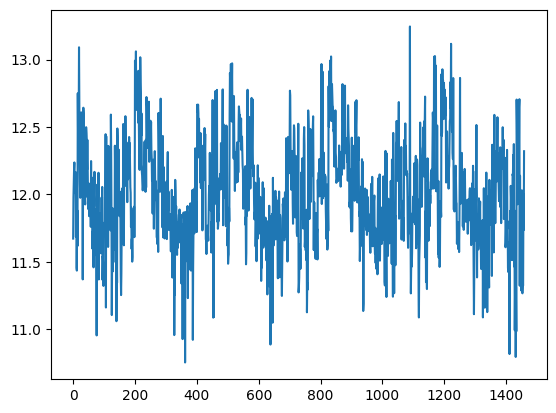

In [84]:
plt.plot(ridge_final_pred)

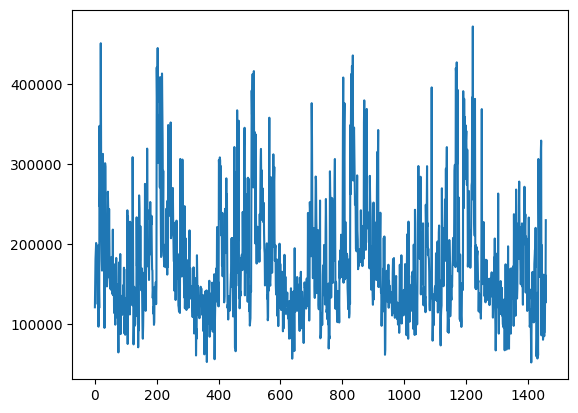

In [85]:
final_prediction = np.expm1(final_prediction)
plt.plot(final_prediction)

In [86]:
submission = pd.DataFrame({'Id' : raw_test.Id, 'SalePrice' : final_prediction})
submission.to_csv('outlier_test.csv',index=False)